In [ ]:
!pip install mendelai-brat-parser
!pip install stc

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('universal_tagset')

  Created wheel for mendelai-brat-parser: filename=mendelai_brat_parser-0.0.11-py3-none-any.whl size=4945 sha256=a1be68e7c93514b0271672fbbf42bae247730f663c39bd8219a5e82b772dda0e
  Stored in directory: /root/.cache/pip/wheels/7e/40/73/4f68f4fa597be33e250400cd56c28c85862b1cba5b3c7c33f1
Successfully built mendelai-brat-parser
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import regex as re
from collections import Counter
import math

from google.colab import files
import zipfile
import glob

from brat_parser import get_entities_relations_attributes_groups

from nltk.tag import pos_tag, map_tag

from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from brat_parser import get_entities_relations_attributes_groups

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from stc import SparseTensorClassifier
from scipy.stats import spearmanr

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
# Neural network imports.
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input, Dropout
from keras.layers import TimeDistributed
from keras.layers import Concatenate
from keras.layers import LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model, Input

In [ ]:
# Import the statistics and positions information of the sentences to classify.
print('\nImport sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport essay_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport remaining_stat.csv\n')
upload = files.upload()


Import sentence_statistic.csv




Import sentence_POS.csv




Import sentence_simple_POS.csv




Import sentence_dependency.csv




Import sentence_dependency_tree_stat.csv




Import sentence_named_entity_BOW.csv




Import essay_BOW_appendix_words.csv




Import remaining_stat.csv



In [ ]:
# Import the data relative to the sentences positions and statistics of the IBM Debater dataset
# (Debater_sentence_statistic.csv).
print('\nImport Debater_sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport Debater_sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport Debater_sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport Debater_sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport Debater_sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport Debater_sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport Debater_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport Debater_remaining_stat.csv\n')
upload = files.upload()


Import Debater_sentence_statistic.csv




Import Debater_sentence_POS.csv




Import Debater_sentence_simple_POS.csv




Import Debater_sentence_dependency.csv




Import Debater_sentence_dependency_tree_stat.csv




Import Debater_sentence_named_entity_BOW.csv




Import Debater_BOW_appendix_words.csv




Import Debater_remaining_stat.csv



In [ ]:
# Import the Stab and Gurevych dataset.

uploaded = files.upload()

Saving ArgumentAnnotatedEssays-2.0.zip to ArgumentAnnotatedEssays-2.0.zip


In [ ]:
# Import the premise positions in the articles for the IBM Debater dataset (premise-positions.txt).

uploaded = files.upload()

# Import the claims positions in the articles for the IBM Debater dataset (claim-positions.txt).

uploaded = files.upload()

Saving premise-positions.txt to premise-positions.txt


Saving IBM_Debater_(R)_CE-EMNLP-2015.v3.zip to IBM_Debater_(R)_CE-EMNLP-2015.v3.zip


In [ ]:
# Import the IBM Debater dataset (2015 version).

uploaded = files.upload()

# **Stab and Gurevych Dataset**

In [ ]:
# Function to extract zip file.
# Takes in input the path to the zip file (path_zip) and the one to store the destination directory (path_destination).

def extract_zip(path_zip,path_destination):
  with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_destination)


In [ ]:
# Extract zip file (two zip files one inside the other).

extract_zip('ArgumentAnnotatedEssays-2.0.zip','ArgumentAnnotatedEssays-2.0')

extract_zip('ArgumentAnnotatedEssays-2.0/ArgumentAnnotatedEssays-2.0/brat-project-final.zip','ArgumentAnnotatedEssays')

## **Create and visualize the required Dataframe**

In [ ]:
# Extract the list of text files of the essays in the dataset.
txt_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.txt"))

# Extract the list of text files of the essays in the dataset.
ann_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.ann"))

In [ ]:
# List of text files of the essays.
txt_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.txt']

In [ ]:
# List of the annotated files of the essays.
ann_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.ann']

In [ ]:
# Transfor the ann files into four dictionaries.
ann_disctionaries=[get_entities_relations_attributes_groups(file) for file in ann_files]

# Transform the first dictionary (entities) obtained from each ann file into a dataset.
essay_ann_datasets = [pd.DataFrame.from_dict(entities, orient='index') for entities,_,_,_ in ann_disctionaries]

In [ ]:
# Sort the lists composed of a (entity) dataset for each essay.
essay_ann_datasets=[dataset.sort_values(by='span', key=lambda col: col.map(lambda x: x[0][0])) for dataset in essay_ann_datasets]  

# Add a coloumn into the dataset that identifies the document
for i in range(len(essay_ann_datasets)):
  essay_ann_datasets[i].insert(0,'doc_id',i)

# Create a common dataset
essay_argument_dataset = pd.concat(essay_ann_datasets)

In [ ]:
# Sobstitue the values in the "span" feature (substitute each tuple with its first inner tuple)
for i in range(len(essay_argument_dataset.index)):
  essay_argument_dataset['span'][i]=essay_argument_dataset['span'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
essay_argument_dataset.head()

,doc_id,id,type,span,text
T1,0,T1,MajorClaim,"(503, 575)",we should attach more importance to cooperatio...
T3,0,T3,Claim,"(591, 714)","through cooperation, children can learn about ..."
T4,0,T4,Premise,"(716, 851)",What we acquired from team work is not only ho...
T5,0,T5,Premise,"(853, 1086)","During the process of cooperation, children ca..."
T6,0,T6,Premise,"(1088, 1191)",All of these skills help them to get on well w...


## **IOB and word list of the Corpus**

In [ ]:
# List of texts of the essays
files_text=[open(file).read() for file in txt_files]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "span" coloumn of the Dataframe of the annotation.

sorted_span=[list(essay_argument_dataset.loc[essay_argument_dataset['doc_id'] == i,['span','type']].values) for i in range(len(ann_files))]

In [ ]:
sorted_span[0]

[array([(503, 575), 'MajorClaim'], dtype=object),
 array([(591, 714), 'Claim'], dtype=object),
 array([(716, 851), 'Premise'], dtype=object),
 array([(853, 1086), 'Premise'], dtype=object),
 array([(1088, 1191), 'Premise'], dtype=object),
 array([(1212, 1301), 'Premise'], dtype=object),
 array([(1332, 1376), 'Claim'], dtype=object),
 array([(1387, 1492), 'Premise'], dtype=object),
 array([(1549, 1846), 'Premise'], dtype=object),
 array([(1927, 1992), 'Claim'], dtype=object),
 array([(2154, 2231), 'MajorClaim'], dtype=object)]

In [ ]:
# Tranform the couples of points ((start,end) of each section) to a list (separator of different section).

span_points=[]

for i in range(len(sorted_span)):
  list_points=[sep for sub in sorted_span[i] for sep in sub[0]]
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(files_text[i]))
  span_points.append(list_points)

In [ ]:
span_points[0]

[0,
 503,
 575,
 591,
 714,
 716,
 851,
 853,
 1086,
 1088,
 1191,
 1212,
 1301,
 1332,
 1376,
 1387,
 1492,
 1549,
 1846,
 1927,
 1992,
 2154,
 2231,
 2232]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(files_text)):
  split_text.append([files_text[z][i: j] for i, j in zip(span_points[z], span_points[z][1:])])

In [ ]:
split_text[0][0:10]

["Should students be taught to compete or to cooperate?\n\nIt is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that ",
 'we should attach more importance to cooperation during primary education',
 '.\nFirst of all, ',
 'through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
 '. ',
 'What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others',
 '. ',
 'During the process of cooperation, children can learn about how to listen to opinions of others, how to com

In [ ]:
# Get the list of the words of each essay and the corresponding labels 
# ( argumentative section, premise or claim indicated through IOB).

Y_IOB=[]
X_essay_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  essay_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the essay examined.
  next_type=0

  # Remove title from essay considered (splitted_text)
  no_title=[re.sub(r".*\n\n","",text) for text in split_text[i]]

  # Set boolean value next_token_is_argumentative to false.
  # (first section of each essay is never argumentative, it's the one containing the title).
  next_token_is_argumentative=False

  for section in no_title:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    essay_word_list+=seq

    if next_token_is_argumentative:
      if sorted_span[i][next_type][1]=='Premise':
        for token in range(len(seq)):
          IOB+=['P']
      else:
        for token in range(len(seq)):
          IOB+=['C']
      next_type += 1
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB.append(IOB)
  X_essay_word_list.append(essay_word_list)

In [ ]:
for i in range(80,120):
  print(X_essay_word_list[0][i]+" - "+Y_IOB[0][i])

i - O
firmly - O
believe - O
that - O
we - C
should - C
attach - C
more - C
importance - C
to - C
cooperation - C
during - C
primary - C
education - C
. - O
first - O
of - O
all - O
, - O
through - C
cooperation - C
, - C
children - C
can - C
learn - C
about - C
interpersonal - C
skills - C
which - C
are - C
significant - C
in - C
the - C
future - C
life - C
of - C
all - C
students - C
. - O
what - P


## **Find out sentences which contain argumentative section**

In [ ]:
# Get the list of all the sentences.

sentence_list=[]

# Get the list of the id of the essay for each of the sentences of the corpus.
essay_id_list=[]

# Get the list of all the argumentative sections.

arg_sections_list=[]

# List of the number of sentences that are part of an agumentative sections 
# besides the first one.
# One element for each argumentative section.

arg_section_len_list=[]

# Get the list containing the label of each argumentative section.
# The label will be 0 for a claim and 1 for a premise. 

labels_list=[]

# List that contains for all the argumentative sections of the corpus the corresponding
# starting sentence (odered by essay and starting point and starting point in the text). 
argument_to_sentence_map=[]


for essay_id in range(len(X_essay_word_list)):
  sentence=""
  arg_section=""
  argument=False
  # Number of sentences that are part of an agumentative sections besides the first one.
  count_sentences_in_arg_section=0

  for word_id in range(len(X_essay_word_list[essay_id])):
    
    word=X_essay_word_list[essay_id][word_id]
    bio_of_word=Y_IOB[essay_id][word_id]

    if not (bio_of_word=='O'):
      arg_section+=word+" "
      # For each argumentative section found, store the corresponding starting sentence.
      if not argument:
        argument_to_sentence_map.append(len(sentence_list))
        argument=True
        if bio_of_word=='C':
          labels_list.append(0)
        else:
          labels_list.append(1)
    else:
      # Check if it the first word out of an argomentative sections.
      if argument:
        arg_sections_list.append(arg_section)
        arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
      argument=False

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""
    
  if not (arg_section==""):
        arg_sections_list.append(arg_section)
        arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
        argument=False

  if not (sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)

      if argument:
        count_sentences_in_arg_section+=1

      sentence=""

In [ ]:
len(sentence_list)

6738

In [ ]:
len(argument_to_sentence_map)

6089

In [ ]:
len(labels_list)

6089

In [ ]:
len(arg_sections_list)

6089

In [ ]:
len(arg_section_len_list)

6089

In [ ]:
count=0

for count_sentences in arg_section_len_list:
  if count_sentences>0:
    count+=1

print(count)     

4


## **Select the sections to classify and the labels**

In [ ]:
arg_sections_list[0:10]

['we should attach more importance to cooperation during primary education ',
 'through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 'what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred ',
 'all of these skills help them to get on well with other people and will benefit them for the whole life ',
 'the significance of competition is that how to become more excellence to gain the victory ',
 'competition makes the society more effective ',
 'when we consider about the question that how to win the game , we always find that we need the cooperation ',
 'take olympic games which is a form of c

In [ ]:
# Transform the sections in the sequences of their words.
X_sections_word_list=[nltk.word_tokenize(section) for section in arg_sections_list]

In [ ]:
# Part of sentence preceding the section and the sentence before.
sentence_before_section=[]

# Part of sentence following the section and the sentence after.
sentence_after_section=[]

for i in range(len(argument_to_sentence_map)):

  sentence_id=argument_to_sentence_map[i]

  sentence=sentence_list[sentence_id]

  for j in range(arg_section_len_list[i]):
    if not (sentence[-2]=='?' or sentence[-2]=='!'):
      sentence=sentence+". "+sentence_list[sentence_id+j+1]
    else:
      sentence=sentence+sentence_list[sentence_id+j+1]

  # Get the parts of the sentence containing the argumentative section before
  # and after the section.
  before,after=sentence.split(arg_sections_list[i])

  # If the section it isn't in the first sentence of an essay attach to the
  # already retrieved preciding section the entire sentence before the one 
  # containing the section. 

  if (sentence_id>0) and (essay_id_list[sentence_id]==essay_id_list[sentence_id-1]):
    sentence_before=sentence_list[sentence_id-1]
    if not (sentence_before[-2]=='?' or sentence_before[-2]=='!'):
      before=sentence_before+". "+before
    else:
      before=sentence_list[sentence_id-1]+" "+before

  # If the section it isn't in the last sentence of an essay attach to the
  # already retrieved following section the entire sentence after the one 
  # containing the section. 
  if (sentence_id<len(sentence_list)-1) and (essay_id_list[sentence_id]==essay_id_list[sentence_id+1]):
    if len(after)>1 and (after[-2]=='?' or after[-2]=='!'):
      after=after+" "+sentence_list[sentence_id+arg_section_len_list[i]+1]
    else:
      after=after+". "+sentence_list[sentence_id+arg_section_len_list[i]+1]

  sentence_before_section.append(before)
  sentence_after_section.append(after)

In [ ]:
sentence_before_section[:5]

["however , when we discuss the issue of competition or cooperation , what we are concerned about is not the whole society , but the development of an individual 's whole life . from this point of view , i firmly believe that ",
 'from this point of view , i firmly believe that we should attach more importance to cooperation during primary education . first of all , ',
 'first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students . ',
 'what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others . ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred . ']

In [ ]:
sentence_after_section[:5]

['. first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 '. what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 '. during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred ',
 '. all of these skills help them to get on well with other people and will benefit them for the whole life ',
 '. on the other hand , the significance of competition is that how to become more excellence to gain the victory ']

In [ ]:
# Transform the sections before and after the argumentative sections in the 
# sequences of their words.
X_before_word_list=[nltk.word_tokenize(section) for section in sentence_before_section]
X_after_word_list=[nltk.word_tokenize(section) for section in sentence_after_section]

In [ ]:
# Extract labels, assign label 1 for the premises and 0 for the claims.

Y=np.array(labels_list)

Y

array([0, 0, 1, ..., 1, 1, 0])

# **Debater Dataset**

## **Claim and premise extraction**

In [ ]:
# Extract a zip file.
def import_zip(source: str, destination =""):
  with zipfile.ZipFile(source, 'r') as zip_ref:
    zip_ref.extractall(destination)

In [ ]:
# Extract the dataset.
import_zip("IBM_Debater_(R)_CE-EMNLP-2015.v3.zip")

In [ ]:
# Read the files containing the labeled claim and premises.
claim_data=open("claim-positions.txt").read()
premise_data=open("premise-positions.txt").read()

In [ ]:
# Create a list which contains as elements the lines in the original document.
claim_lines=claim_data.split("\n")
premise_lines=premise_data.split("\n")

In [ ]:
# Separate each line of the document passed at the character '\t'.
# This character is the one used to separate the various component in each line
# of the document.
# In case of claims, also separate the first line from the rest of the document.
# The first line contains the description of the content of the other lines.

claim_list=[line.split("\t") for line in claim_lines][:-1]
premise_list=[line.split("\t") for line in premise_lines][:-1]

In [ ]:
claim_list[:2]

[['Sentence',
  'Article position in list',
  'Sentence starting point',
  'Sentence ending point'],
 ['exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world',
  '0',
  '418',
  '568']]

In [ ]:
# Create the two dataframes (trainsform the string representing numeric values into integer).

claim_dataframe=pd.DataFrame(claim_list[1:],columns=['sentence','article_id','start','end'])
claim_dataframe=claim_dataframe.astype({'article_id':int,'start':int,'end':int})

premise_dataframe=pd.DataFrame(premise_list[1:],columns=['sentence','article_id','start','end'])
premise_dataframe=premise_dataframe.astype({'article_id':int,'start':int,'end':int})

In [ ]:
claim_dataframe.head()

,sentence,article_id,start,end
0,exposure to violent video games causes at leas...,0,418,568
1,video game violence is not related to serious ...,0,829,907
2,some violent video games may actually have a p...,0,1004,1082
3,exposure to violent video games causes both sh...,0,1442,1577
4,they increase the violent tendencies among youth,0,3900,3948


In [ ]:
# Add the type of argumentative sections into the dataframes.
premise_type=["premise" for p in range(len(premise_list)-1)]
claim_type=["claim" for c in range(len(claim_list)-1)]

claim_dataframe["type"]=claim_type
premise_dataframe["type"]=premise_type

In [ ]:
claim_dataframe.head()

,sentence,article_id,start,end,type
0,exposure to violent video games causes at leas...,0,418,568,claim
1,video game violence is not related to serious ...,0,829,907,claim
2,some violent video games may actually have a p...,0,1004,1082,claim
3,exposure to violent video games causes both sh...,0,1442,1577,claim
4,they increase the violent tendencies among youth,0,3900,3948,claim


In [ ]:
# Concatenate the two dataframes into one.
argumentative_dataframe=pd.concat([claim_dataframe,premise_dataframe])

## **IOB and word list**

In [ ]:
# Extract original articles text.
import_zip("IBM_Debater_(R)_CE-EMNLP-2015.v3/articles.zip","IBM_Debater_(R)_CE-EMNLP-2015.v3")

In [ ]:
# Read the list of articles used in the dataset.
txt_articles = sorted(glob.glob("IBM_Debater_(R)_CE-EMNLP-2015.v3/articles/clean_*.txt"))

articles_text=[open(file).read() for file in txt_articles]

In [ ]:
articles_text[0]

'. \n\nControversies over video games often center on topics such as video game graphic violence, sex and sexism, violent and gory scenes, partial or full nudity, portrayal of criminal behavior, racism, and other provocative and objectionable material. \n\nVideo games have been studied for links to addiction and aggression. Earlier meta-analyses (an analysis of several studies) were conflicting. A 2001 study found that exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world. A decrease in prosocial behavior (caring about the welfare and rights of others) was also noted [REF]. Another 2001 meta-analyses using similar methods[REF] and a more recent 2009 study focusing specifically on serious aggressive behavior[REF] concluded that video game violence is not related to serious aggressive behavior in real life. \n\nMany potential positive effects have been proposed [REF]. Recent research has sugg

In [ ]:
# Get the sorted list of the indicators of the articles used. 
articles_used=sorted(list(set(argumentative_dataframe['article_id'])))

In [ ]:
len(articles_used)

513

In [ ]:
articles_used[:5]

[0, 3, 19, 21, 32]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "start" and "end" coloumns of the Dataframe 
# created containing both types of argumentative sentences (argumentative_dataframe).

sorted_span=[sorted(list(argumentative_dataframe.loc[argumentative_dataframe['article_id'] == article,['start','end','type','article_id']].values), key=lambda element: element[0] ) for article in articles_used]

In [ ]:
len(sorted_span)

513

In [ ]:
sorted_span[0][0:10]

[array([394, 568, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([418, 568, 'claim', 0], dtype=object)]

In [ ]:
# Join toghether all the argumentative section relating to the same section of 
# the text.

non_repeated_argumentative=[]

for article in sorted_span:
  non_repeated=[]
  article_id=article[0][3]
  start=article[0][0]
  end=article[0][1]
  argument_type=article[0][2]
  for i in range(1,len(article)):
    if end>article[i][0]:
      start=min(start,article[i][0])
      end=max(end,article[i][1])
      if not argument_type==article[i][2]:
        argument_type="both"
    else:
      non_repeated.append([start,end,argument_type,article_id])
      start=article[i][0]
      end=article[i][1]
      argument_type=article[i][2]
  non_repeated_argumentative.append(non_repeated)

In [ ]:
non_repeated_argumentative[0][0:20]

[[394, 670, 'both', 0],
 [673, 907, 'both', 0],
 [911, 1111, 'both', 0],
 [1323, 1577, 'both', 0],
 [2944, 3540, 'premise', 0],
 [3900, 3948, 'claim', 0],
 [3965, 4215, 'both', 0],
 [4217, 4479, 'premise', 0],
 [5514, 5803, 'both', 0],
 [6679, 7317, 'both', 0],
 [7434, 7830, 'both', 0],
 [7833, 8213, 'premise', 0],
 [8402, 8770, 'premise', 0],
 [8776, 9190, 'both', 0],
 [9192, 9396, 'premise', 0],
 [9713, 9857, 'both', 0],
 [9863, 10296, 'both', 0],
 [10301, 10782, 'both', 0],
 [11201, 11483, 'premise', 0],
 [12724, 13099, 'both', 0]]

In [ ]:
# Number of argumentative section remaining.
sum([len(non_repeated) for non_repeated in non_repeated_argumentative])

2925

In [ ]:
# Tranform the couples of points ((start,end) of each non-repeated section) 
# to a list (separator of different section).
non_repeated_span_points=[]

for i in range(len(non_repeated_argumentative)):
  list_points=[]
  for sect in non_repeated_argumentative[i]:
    list_points.append(sect[0])
    list_points.append(sect[1])
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(articles_text[articles_used[i]]))
  non_repeated_span_points.append(list_points)

In [ ]:
non_repeated_span_points[0][0:10]

[0, 394, 670, 673, 907, 911, 1111, 1323, 1577, 2944]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(articles_used)):
  split_text.append([articles_text[articles_used[z]][i: j] for i, j in zip(non_repeated_span_points[z], non_repeated_span_points[z][1:])])

In [ ]:
split_text[0][:10]

['. \n\nControversies over video games often center on topics such as video game graphic violence, sex and sexism, violent and gory scenes, partial or full nudity, portrayal of criminal behavior, racism, and other provocative and objectionable material. \n\nVideo games have been studied for links to addiction and aggression. Earlier meta-analyses (an analysis of several studies) were conflicting. ',
 'A 2001 study found that exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world. A decrease in prosocial behavior (caring about the welfare and rights of others) was also noted [REF',
 ']. ',
 'Another 2001 meta-analyses using similar methods[REF] and a more recent 2009 study focusing specifically on serious aggressive behavior[REF] concluded that video game violence is not related to serious aggressive behavior in real life',
 '. \n\n',
 'Many potential positive effects have been proposed [REF]

In [ ]:
# Remove articles with less than 6 section between argumentative and non argumentative.
not_remove=[i for i in range(len(split_text)) if len(split_text[i])>5]
split_text=[split_text[i] for i in not_remove]
non_repeated_argumentative=[non_repeated_argumentative[i] for i in not_remove]
articles_used=[articles_used[i] for i in not_remove]

In [ ]:
len(split_text)

271

In [ ]:
Y_IOB_Debater=[]
X_article_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  article_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the articlele examined.
  next_type=0
  
  # Remove the "[REF]" and "|-" from the text.
  texts=[re.sub(r"\[REF[\]$]*","",text) for text in split_text[i]]
  texts=[re.sub(r"^\]","",text) for text in texts]
  texts=[re.sub(r"|-","",text) for text in texts]

  # Set boolean value next_token_is_argumentative to false.
  # (first section is never argumentative, in case first sentence was argumentative
  # a fake section as been added previously).
  next_token_is_argumentative=False

  for section in texts:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    article_word_list+=seq

    if next_token_is_argumentative:
      if non_repeated_argumentative[i][next_type][2]=='premise':
        IOB+=['B-P']
        for token in range(len(seq)-1):
          IOB+=['I-P']
      else:
        if non_repeated_argumentative[i][next_type][2]=='claim':
          IOB+=['B-C']
          for token in range(len(seq)-1):
            IOB+=['I-C']
        else:
          IOB+=['B-B']
          for token in range(len(seq)-1):
            IOB+=['I-B']  
      next_type += 1
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB_Debater.append(IOB)
  X_article_word_list.append(article_word_list)

In [ ]:
for i in range(80,100):
  print(X_article_word_list[0][i]+" - "+Y_IOB_Debater[0][i])

least - I-B
a - I-B
temporary - I-B
increase - I-B
in - I-B
aggression - I-B
and - I-B
that - I-B
this - I-B
exposure - I-B
correlates - I-B
with - I-B
aggression - I-B
in - I-B
the - I-B
real - I-B
world - I-B
. - I-B
a - I-B
decrease - I-B


## **Find out sentences which contain argumentative section**

In [ ]:
# Get the list of sententences of each artile.

articles_Debater_sentence_list=[]

for article_id in range(len(X_article_word_list)):
  temp_article_Debater_sentence_list=[]
  sentence=""

  for word_id in range(len(X_article_word_list[article_id])):
    
    word=X_article_word_list[article_id][word_id]

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and (not sentence==""):
      temp_article_Debater_sentence_list.append(sentence)
      sentence=""
      
  articles_Debater_sentence_list.append(temp_article_Debater_sentence_list)

In [ ]:
sentences_word_list=[[nltk.word_tokenize(sentence) for sentence in article] for article in articles_Debater_sentence_list]

In [ ]:
# Remove articles with sections of more than 150 words.
not_remove=[i for i in range(len(sentences_word_list)) if max([len(sentence) for sentence in sentences_word_list[i]])<=150]
X_article_word_list=[X_article_word_list[i] for i in not_remove]
Y_IOB_Debater=[Y_IOB_Debater[i] for i in not_remove]
split_text=[split_text[i] for i in not_remove]
non_repeated_argumentative=[non_repeated_argumentative[i] for i in not_remove]
articles_used=[articles_used[i] for i in not_remove]

In [ ]:
len(not_remove)

251

In [ ]:
# Get the list of all the sentences.

Debater_sentence_list=[]

# Get the list of the id of the articlele for each of the sentences of the corpus.
article_id_list=[]

# Get the list of all the argumentative sections.

Debater_arg_sections_list=[]

# List of the number of sentences that are part of an agumentative sections 
# besides the first one.
# One element for each argumentative section.

Debater_arg_section_len_list=[]

# Get the list containing the label of each argumentative section.
# The label will be 0 for a claim and 1 for a premise. 

Debater_labels_list=[]

# List that contains for all the argumentative sections of the corpus the corresponding
# starting sentence (odered by article and starting point and starting point in the text). 
Debater_argument_to_sentence_map=[]


for article_id in range(len(X_article_word_list)):
  sentence=""
  arg_section=""
  argument=False
  # Number of sentences that are part of an agumentative sections besides the first one.
  count_sentences_in_arg_section=0

  for word_id in range(len(X_article_word_list[article_id])):
    
    word=X_article_word_list[article_id][word_id]
    bio_of_word=Y_IOB_Debater[article_id][word_id]

    if not (bio_of_word=='O' or bio_of_word=='B-B' or bio_of_word=='I-B'):
      # For each argumentative section found, store the corresponding starting sentence.
      if bio_of_word=='B-C' or bio_of_word=='B-P':
        if not (arg_section==""):
          Debater_arg_sections_list.append(arg_section)
          Debater_arg_section_len_list.append(count_sentences_in_arg_section)
          arg_section=""
          count_sentences_in_arg_section=0
        Debater_argument_to_sentence_map.append(len(Debater_sentence_list))
        argument=True
        if bio_of_word=='B-C':
          Debater_labels_list.append(0)
        else:
          Debater_labels_list.append(1)
      arg_section+=word+" "

    else:
      # Check if it the first word out of an argomentative sections.
      if argument:
        Debater_arg_sections_list.append(arg_section)
        Debater_arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
      argument=False

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      Debater_sentence_list.append(sentence)
      article_id_list.append(article_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""
    
  if not (arg_section==""):
        Debater_arg_sections_list.append(arg_section)
        Debater_arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
        argument=False

  if not (sentence==""):
      Debater_sentence_list.append(sentence)
      article_id_list.append(article_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""

In [ ]:
len(Debater_sentence_list)

44936

In [ ]:
len(Debater_argument_to_sentence_map)

2062

In [ ]:
len(Debater_labels_list)

2062

In [ ]:
len(Debater_arg_sections_list)

2062

In [ ]:
len(Debater_arg_section_len_list)

2062

In [ ]:
count=0

for count_sentences in Debater_arg_section_len_list:
  if count_sentences>0:
    count+=1

print(count)     

571


## **Select the sections to classify and the labels**

In [ ]:
Debater_arg_sections_list[0:10]

["a 1998 study conducted at the university of central florida found that of the 33 games sampled , 41 % do not feature female characters , 28 % portrayed women as sex objects , 21 % depicted violence against women , and 30 % did not represent the female population at all . furthermore , characterizations of women tended to be stereotypical : highly sexualized ( `` visions of beauty with large breasts and hips '' ) , dependent ( `` victim or as the proverbial 'damsel in distress ' '' ) , opposed ( `` evil or as obstacles to the goal of the game '' ) , and trivial ( `` females depicted [ .. ] in fairly nonsignificant roles '' ) ",
 'they increase the violent tendencies among youth ',
 'one study did find an increase in reports of bullying , noting , `` our research found that certain patterns of video game play were much more likely to be associated with these types of behavioral problems than with major violent crime such as school shootings ',
 'however metaanalyses by other groups hav

In [ ]:
# Transform the sections in the sequences of their words.
X_Debater_sections_word_list=[nltk.word_tokenize(section) for section in Debater_arg_sections_list]

In [ ]:
# Part of sentence preceding the section and the sentence before.
Debater_sentence_before_section=[]

# Part of sentence following the section and the sentence after.
Debater_sentence_after_section=[]

for i in range(len(Debater_argument_to_sentence_map)):

  sentence_id=Debater_argument_to_sentence_map[i]

  sentence=Debater_sentence_list[sentence_id]

  for j in range(Debater_arg_section_len_list[i]):
    if not (sentence[-2]=='?' or sentence[-2]=='!'):
      sentence=sentence+". "+Debater_sentence_list[sentence_id+j+1]
    else:
      sentence=sentence+Debater_sentence_list[sentence_id+j+1]

  # Get the parts of the sentence containing the argumentative section before
  # and after the section.
  list_sections=sentence.split(Debater_arg_sections_list[i])
  
  before=list_sections[0]
  after=list_sections[1]
  for k in range(2,len(list_sections)):
    after=after+list_sections[k]

  # If the section it isn't in the first sentence of an essay attach to the
  # already retrieved preciding section the entire sentence before the one 
  # containing the section. 

  if (sentence_id>0) and (article_id_list[sentence_id]==article_id_list[sentence_id-1]):
    sentence_before=Debater_sentence_list[sentence_id-1]
    if not (sentence_before[-2]=='?' or sentence_before[-2]=='!'):
      before=sentence_before+". "+before
    else:
      before=Debater_sentence_list[sentence_id-1]+" "+before

  # If the section it isn't in the last sentence of an essay attach to the
  # already retrieved following section the entire sentence after the one 
  # containing the section. 
  if (sentence_id<len(Debater_sentence_list)-1) and (article_id_list[sentence_id]==article_id_list[sentence_id+1]):
    if len(after)>1 and (after[-2]=='?' or after[-2]=='!'):
      after=after+" "+Debater_sentence_list[sentence_id+Debater_arg_section_len_list[i]+1]
    else:
      after=after+". "+Debater_sentence_list[sentence_id+Debater_arg_section_len_list[i]+1]

  Debater_sentence_before_section.append(before)
  Debater_sentence_after_section.append(after)

In [ ]:
Debater_sentence_before_section[:5]

['as of 2011 , over 40 % of players are female . however , ',
 'however , this report has been criticized for not representing a wide range of video games , and that the games analysed , being up to 20 years old , do not represent the current status of the video game industry , and that strong female characters are now increasingly more prevalent . one of the most common criticisms of video games is that ',
 "however , several major studies by groups such as the harvard medical school center for mental health , the journal of adolescent health , and the british medical journal have shown no conclusive link between video game usage and violent activity . '' ",
 'the research comprised a meta analysis , laboratory and field studies . ',
 'compared the effects of violent video games to those of smoking on lung cancer this view has been challenged , however . for instance , ']

In [ ]:
Debater_sentence_after_section[:5]

['. however , this report has been criticized for not representing a wide range of video games , and that the games analysed , being up to 20 years old , do not represent the current status of the video game industry , and that strong female characters are now increasingly more prevalent ',
 '. however , several major studies by groups such as the harvard medical school center for mental health , the journal of adolescent health , and the british medical journal have shown no conclusive link between video game usage and violent activity ',
 ". one of the first widely accepted controversial video games was developer exidy 's 1976 title death race , in which players controlled cars that ran over pixelated representations of `` gremlins '' ",
 ') . a study by dr. craig a. anderson et al ',
 '. other studies reach the conclusion that violence in video games is not causally linked with aggressive tendencies ']

In [ ]:
# Transform the sections before and after the argumentative sections in the 
# sequences of their words.
X_Debater_before_word_list=[nltk.word_tokenize(section) for section in Debater_sentence_before_section]
X_Debater_after_word_list=[nltk.word_tokenize(section) for section in Debater_sentence_after_section]

In [ ]:
# Extract labels, assign label 1 for the premises and 0 for the claims.

Y_Debater=np.array(Debater_labels_list)

Y_Debater

array([1, 0, 1, ..., 1, 1, 1])

# **Word2vec and one-hot-encoding**

In [ ]:
import gensim
import gensim.downloader as api

path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Load Google Word2Vec model
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [ ]:
# Get the maximum lenght of the argumentative sections of the essays.

X_sections_word_list=X_sections_word_list+X_Debater_sections_word_list
X_before_word_list=X_before_word_list+X_Debater_before_word_list
X_after_word_list=X_after_word_list+X_Debater_after_word_list

text_len = [len(text) for text in X_sections_word_list]
MAX_LEN = max(text_len)
print("Max lenght of the argumentative sections: {}".format(MAX_LEN))

text_len = [len(text) for text in X_before_word_list]
MAX_LEN_BEFORE = max(text_len)
print("Max lenght of the sections before the argumentative sections: {}".format(MAX_LEN_BEFORE))

text_len = [len(text) for text in X_after_word_list]
MAX_LEN_AFTER = max(text_len)
print("Max lenght of the sections after the argumentative sections: {}".format(MAX_LEN_AFTER))

Max lenght of the argumentative sections: 264
Max lenght of the sections before the argumentative sections: 149
Max lenght of the sections after the argumentative sections: 183


In [ ]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(X_sections_word_list)
X = text_tokenizer.texts_to_sequences(X_sections_word_list)
X = pad_sequences(X, maxlen=MAX_LEN, padding="pre")

text_tokenizer_before = Tokenizer()
text_tokenizer_before.fit_on_texts(X_before_word_list)
X_before = text_tokenizer_before.texts_to_sequences(X_before_word_list)
X_before = pad_sequences(X_before, maxlen=MAX_LEN_BEFORE, padding="pre")

text_tokenizer_after = Tokenizer()
text_tokenizer_after.fit_on_texts(X_after_word_list)
X_after = text_tokenizer_after.texts_to_sequences(X_after_word_list)
X_after = pad_sequences(X_after, maxlen=MAX_LEN_AFTER, padding="pre")

In [ ]:
# Each word in the Word2vec model used is embedded trough a vector of size 300
EMBEDDING_SIZE  = 300

# Size of the vocabulary used
VOCABULARY_SIZE = len(text_tokenizer.word_index) + 1
VOCABULARY_SIZE_BEFORE = len(text_tokenizer_before.word_index) + 1
VOCABULARY_SIZE_AFTER = len(text_tokenizer_after.word_index) + 1

# Create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
embedding_weights_before = np.zeros((VOCABULARY_SIZE_BEFORE, EMBEDDING_SIZE))
embedding_weights_after = np.zeros((VOCABULARY_SIZE_AFTER, EMBEDDING_SIZE))

# Create a word to index dictionary mapping
word2id = text_tokenizer.word_index
word2id_before = text_tokenizer_before.word_index
word2id_after = text_tokenizer_after.word_index

# Copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_before.items():
    try:
        embedding_weights_before[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_after.items():
    try:
        embedding_weights_after[index, :] = word2vec_model[word]
    except KeyError:
        print(word)                

Output streaming troncato alle ultime 5000 righe.
0.9
personyears
nonaq
twoloss
111
62
12yearold
bosnian
koza
forestdependent
finetouch
gairdner
metzitzah
meatal
cesare
lombroso
messner
rosenfeld
iqs
ipsosreid
whitlam
maclean
maistre
hakluyt
foti
comstock
whyte
newson
usoc
kreischa
1940
allcause
iccpr
smokingrelated
13.2
14.5
11.9
0.8
cambodia
angkowat
non-tangible
under-age
himself/herself
self-independence
close-downs
well-established
self-centered
payements
eight-hour
ivory-tower
non-stop
easy-to-cook
one-third
gorvernment
well-organized
overweighing
side-effects
opprotunities
falseful
over-rated
enthuasism
garther
hands-on
harder-working
irak
footballworld
hydro-kinetic
interest-free
online-courses
top-of-the-range
teacher-student
occupation-related
well-equipped
short-time
less-used
target-oriented
lesser-known
michaelangelo
picasso
zappa
self-awareness
'your
self-defense
over-dependent
profit-oriented
recognise
brain-washed
colourful
seventeen-year-old
macro-economic
speed-up
rus

# **Split Train and Test set**

In [ ]:
# Create a list of values between 0 and 401, where each value indicate an essay
# in the corpus.

essay_id_list=[i for i in range(402)]

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(essay_id_list,test_size=0.15,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

341


[253, 282, 78, 101, 31, 274, 222, 233, 73, 287]

In [ ]:
print(len(test_set))

test_set[:10]

61


[285, 281, 33, 211, 93, 84, 391, 94, 225, 126]

In [ ]:
X_argumentative_sections_doc=list(essay_argument_dataset['doc_id'])

sections_train_set=[]
sections_test_set=[]

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    sections_test_set.append(i)
  else:
    sections_train_set.append(i)

In [ ]:
len(sections_test_set)

900

In [ ]:
len(sections_train_set)

5189

# **Split Train and Test set Debater**

In [ ]:
X_argumentative_sections_doc=[]
for article in non_repeated_argumentative:
  for section in article:
    if not section[2]=='both':
      X_argumentative_sections_doc.append(section[3])

print(len(X_argumentative_sections_doc))     

2062


In [ ]:
# Create a list of values of articles' id, where each value indicate an article
# in the corpus.

article_id_list=list(set(X_argumentative_sections_doc))

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(article_id_list,test_size=0.25,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

188


[798, 673, 419, 783, 818, 386, 625, 1214, 633, 686]

In [ ]:
print(len(test_set))

test_set[:10]

63


[806, 520, 313, 1116, 689, 853, 389, 506, 528, 1215]

In [ ]:
Debater_sections_train_set=[]
Debater_sections_test_set=[]

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    Debater_sections_test_set.append(i)
  else:
    Debater_sections_train_set.append(i)

In [ ]:
len(Debater_sections_test_set)

514

In [ ]:
len(Debater_sections_train_set)

1548

# **RNN**

In [ ]:
# Create and train recurrent models.

# Bidirectional LSTM model.

def train_BLSTM(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN,))

  model = Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN, weights= [embedding_weights], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(32))(model)
  model = Dropout(0.1)(model)
  model = Dense(8, activation='relu')(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Bidirectional LSTM model for the section preceding the argomentative ones.

def train_before_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_BEFORE,))

  model = Embedding(input_dim=VOCABULARY_SIZE_BEFORE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_BEFORE, weights= [embedding_weights_before], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(32))(model)
  model = Dropout(0.1)(model)
  model = Dense(8, activation='relu')(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Bidirectional LSTM model for the section following the argomentative ones.

def train_after_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_AFTER,))

  model = Embedding(input_dim=VOCABULARY_SIZE_AFTER, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_AFTER, weights= [embedding_weights_after], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(32))(model)
  model = Dropout(0.1)(model)
  model = Dense(8, activation='relu')(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Multimodal model.

def train_MultiModal(X_train:np.ndarray, X_before_train:np.array, X_after_train:np.array, Y_train:np.ndarray)->Model:

  # Create the BLSTM model.
  model_BLSTM,input_BLSTM=train_BLSTM(X_train)
  # Create the others model.
  model_before,input_before=train_before_model(X_before_train)
  model_after,input_after=train_after_model(X_after_train)

  # Concatenate togheter the previous NN.
  concatenation_layer = Concatenate()([model_BLSTM,model_before,model_after])

  output = Dense(1, 'sigmoid')(concatenation_layer)

  final_model=Model([input_BLSTM,input_before,input_after],output)

  final_model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
  
  training_results= final_model.fit([X_train,X_before_train,X_after_train], Y_train, batch_size=64, epochs=50, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=2),])

  # visualise training history
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return final_model

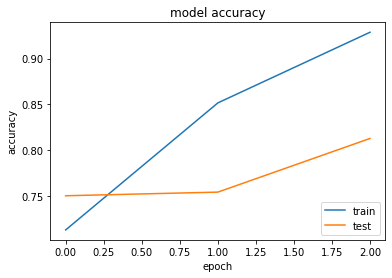

In [ ]:
target_names=['Claim','Premise']
 
y_pred_SG=[]
y_true_SG=[]

X_sg,X_Debater=X[:len(labels_list)], X[len(labels_list):]
X_sg_before,X_Debater_before=X_before[:len(labels_list)], X_before[len(labels_list):]
X_sg_after,X_Debater_after=X_after[:len(labels_list)], X_after[len(labels_list):]

X_train, X_test = np.concatenate((X_sg[sections_train_set],X_Debater[Debater_sections_train_set])), X_sg[sections_test_set]
X_before_train, X_before_test = np.concatenate((X_sg_before[sections_train_set],X_Debater_before[Debater_sections_train_set])), X_sg_before[sections_test_set]
X_after_train, X_after_test = np.concatenate((X_sg_after[sections_train_set],X_Debater_after[Debater_sections_train_set])), X_sg_after[sections_test_set]
Y_train, Y_test = np.concatenate((Y[sections_train_set],Y_Debater[Debater_sections_train_set])), Y[sections_test_set]

# Train the model.
model=train_MultiModal(X_train, X_before_train,X_after_train,Y_train)

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model.predict([X_test, X_before_test, X_after_test]).tolist()
for input in y_pred_temp:
  y_pred_SG.append(round(input[0]))
y_true_SG+=Y_test.tolist()

In [ ]:
len(y_pred_temp[0])

1

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_SG, y_pred_SG, target_names=target_names))   

              precision    recall  f1-score   support

       Claim       0.69      0.68      0.68       330
     Premise       0.82      0.82      0.82       570

    accuracy                           0.77       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.77      0.77      0.77       900



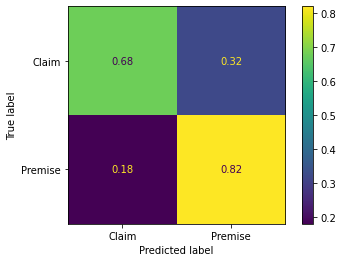

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_SG, y_pred_SG,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Debater Predictions**

In [ ]:
X_Debater_train, X_Debater_test = X_Debater[Debater_sections_train_set], X_Debater[Debater_sections_test_set]
X_Debater_before_train, X_Debater_before_test = X_Debater_before[Debater_sections_train_set], X_Debater_before[Debater_sections_test_set]
X_Debater_after_train, X_Debater_after_test = X_Debater_after[Debater_sections_train_set], X_Debater_after[Debater_sections_test_set]
Y_Debater_test=Y_Debater[Debater_sections_test_set]

In [ ]:
y_pred_Debater=[]
y_true_Debater=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model.predict([X_Debater_test, X_Debater_before_test, X_Debater_after_test]).tolist()
for input in y_pred_temp:
    y_pred_Debater.append(round(input[0]))
y_true_Debater+=Y_Debater_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_Debater, y_pred_Debater, target_names=target_names))   

              precision    recall  f1-score   support

       Claim       0.92      0.63      0.75       222
     Premise       0.77      0.96      0.85       292

    accuracy                           0.82       514
   macro avg       0.84      0.79      0.80       514
weighted avg       0.83      0.82      0.81       514



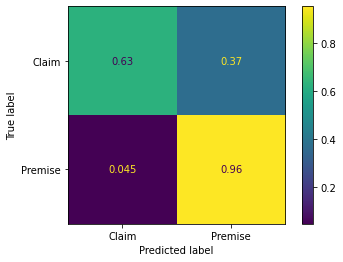

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_Debater, y_pred_Debater,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Sentences predictions**

In [ ]:
# Gets in input the list of ture labels and predicted labels of the test set and returns
# two list.
# One of the list contain only if the prediction are write(1) or wrong(0).
# The other list contain also the indication of the tipe of mistake (true/false positive/negative).

def get_correct_predictions(y_true_list:list,y_pred_list:list):
  result_list=[]
  result_list_int=[]

  for i in range(0,len(y_true_list)):
    correct_prediction=""
    correct_prediction_int=1
    if y_pred_list[i]==0:
      if y_true_list[i]==0:
        correct_prediction="True claim"
      else:
        correct_prediction="False claim"
        correct_prediction_int=0
    else:
      if y_true_list[i]==1:
        correct_prediction="True premise"
      else:
        correct_prediction="False premise"
        correct_prediction_int=0
    result_list.append(correct_prediction)
    result_list_int.append(correct_prediction_int)    

  return result_list, result_list_int



In [ ]:
# Create a list containing the correspondent value of true positive, ture negative,
# false positive and false negative, for the predicitons of the NN on the
# test sets of the two datset. 

# The correlation to select the feature to pass to the STC will be evaluated only 
# on the report of the presence of an error in each sentences (not considering the type
# of the error), sentence_prediction_int list.

sentence_prediction_SG, sentence_prediction_SG_int=get_correct_predictions(y_true_SG, y_pred_SG)
sentence_prediction_Debater, sentence_prediction_Debater_int=get_correct_predictions(y_true_Debater, y_pred_Debater)

# Get the list of the sentences used in the test sets and their length.
test_set_sentences_list_SG=[sentence_list[argument_to_sentence_map[i]] for i in sections_test_set]
test_set_sentences_list_Debater=[Debater_sentence_list[Debater_argument_to_sentence_map[i]] for i in Debater_sections_test_set]
test_set_sentences_length_SG=[arg_section_len_list[i] for i in sections_test_set]
test_set_sentences_length_Debater=[Debater_arg_section_len_list[i] for i in Debater_sections_test_set]

argument_test_set_sentences_list_SG=[arg_sections_list[i] for i in sections_test_set]
argument_test_set_sentences_list_Debater=[Debater_arg_sections_list[i] for i in Debater_sections_test_set]

# For the section in more than one sentence concatenate the sentences together.
for i in range(0,len(test_set_sentences_list_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    test_set_sentences_list_SG[i]+=" . "+sentence_list[argument_to_sentence_map[sections_test_set[i]+j+1]]

for i in range(0,len(test_set_sentences_list_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    test_set_sentences_list_Debater[i]+=" . "+Debater_sentence_list[Debater_argument_to_sentence_map[Debater_sections_test_set[i]+j+1]]    

In [ ]:
len(test_set_sentences_list_SG)

900

In [ ]:
len(sentence_prediction_SG)

900

In [ ]:
sentence_prediction_SG.count("False premise")

106

In [ ]:
sentence_prediction_SG.count("True premise")

467

In [ ]:
sentence_prediction_SG.count("False claim")

103

In [ ]:
sentence_prediction_SG.count("True claim")

224

In [ ]:
len(sentence_prediction_Debater)

514

In [ ]:
sentence_prediction_Debater.count("False premise")

82

In [ ]:
sentence_prediction_Debater.count("True premise")

279

In [ ]:
sentence_prediction_Debater.count("False claim")

13

In [ ]:
sentence_prediction_Debater.count("True claim")

140

## **Correaltion scores**

In [ ]:
# Compute the sorted correlation scores.
# Takes in input a dataframe and a list of labels, returns the sorted (from higher to lower) 
# list of columns names and their correlation value.

def get_correlation_scores(dataframe: pd.DataFrame, labels: list)->list:
  correlation_scores= []

  columns=dataframe.columns
  for column in columns:
    correlation, p_value = spearmanr(dataframe[column].values, labels)
    # Correlation absolute value.
    correlation = np.abs(correlation)
    correlation_scores.append((correlation,column))

  # Sort the correlation scores of each word with the lable by the correlation score associated.
  correlation_scores=sorted(correlation_scores, key=lambda x: (x[0]), reverse=True)    

  return correlation_scores

## **POS preparation**

In [ ]:
# Separate each sentence in the list of POS TAG that compones them.
POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in test_set_sentences_list_SG]
Debater_POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in test_set_sentences_list_Debater]

POS_sentence_list[0]

[('from', 'IN'),
 ('this', 'DT'),
 ('point', 'NN'),
 ('of', 'IN'),
 ('view', 'NN'),
 (',', ','),
 ('i', 'NN'),
 ('firmly', 'RB'),
 ('believe', 'VBP'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('should', 'MD'),
 ('attach', 'VB'),
 ('more', 'JJR'),
 ('importance', 'NN'),
 ('to', 'TO'),
 ('cooperation', 'NN'),
 ('during', 'IN'),
 ('primary', 'JJ'),
 ('education', 'NN')]

In [ ]:
# Create a version with the simplifyed version of the POS tag.

simplified_POS_sentence_list=[]
Debater_simplified_POS_sentence_list=[]

for POS_sentence in POS_sentence_list:
  simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])
for POS_sentence in Debater_POS_sentence_list:
  Debater_simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])  

In [ ]:
simplified_POS_sentence_list[0]

[('from', 'ADP'),
 ('this', 'DET'),
 ('point', 'NOUN'),
 ('of', 'ADP'),
 ('view', 'NOUN'),
 (',', '.'),
 ('i', 'NOUN'),
 ('firmly', 'ADV'),
 ('believe', 'VERB'),
 ('that', 'ADP'),
 ('we', 'PRON'),
 ('should', 'VERB'),
 ('attach', 'VERB'),
 ('more', 'ADJ'),
 ('importance', 'NOUN'),
 ('to', 'PRT'),
 ('cooperation', 'NOUN'),
 ('during', 'ADP'),
 ('primary', 'ADJ'),
 ('education', 'NOUN')]

In [ ]:
# Get the list of the sentences as POS tag from the list of the
# list of the POS tag of each sentence. 
def get_POS_sentence_list(POS_sentence_list: list)->list:
  POS_sentences=[]
  for POS_list in POS_sentence_list:
    sentence=""
    for word, tag in POS_list:
      sentence+=tag+" "
    POS_sentences.append(sentence)    

  return POS_sentences

In [ ]:
POS_sentences=get_POS_sentence_list(POS_sentence_list)
Debater_POS_sentences=get_POS_sentence_list(Debater_POS_sentence_list)
simple_POS_sentences=get_POS_sentence_list(simplified_POS_sentence_list)
Debater_simple_POS_sentences=get_POS_sentence_list(Debater_simplified_POS_sentence_list)

POS_sentences[0]

'IN DT NN IN NN , NN RB VBP IN PRP MD VB JJR NN TO NN IN JJ NN '

## **Customised Tokenizer**

In [ ]:
#  Lemmatization is used.
def build_tokenizer(text):

  wordnet_lemmatizer = WordNetLemmatizer()

  # Text tokenization.
  tokens=nltk.word_tokenize(text)

  # Text normalization throgh lemmatizzation.

  lemmas=[]
  for word in tokens:
    lemmas.append(wordnet_lemmatizer.lemmatize(word))

  return lemmas  

## **Bag of words**

In [ ]:
# Trasformation of the passed corpus in the dataframe of the bag of ngram contained
# in it.
def bag_of_ngram(sentence_list: list, ngram: int)-> pd.DataFrame:
  vectorizer=CountVectorizer(tokenizer=build_tokenizer,ngram_range=(ngram,ngram))
  bag_ngram=vectorizer.fit_transform(sentence_list)

  dataframe=pd.DataFrame(bag_ngram.toarray(), columns=vectorizer.get_feature_names())

  return dataframe

## **POS Bigrams**

In [ ]:
# Get the BOW of the bigrams of the POS tag.

POS_bigrams=bag_of_ngram(POS_sentences,2)
simple_POS_bigrams=bag_of_ngram(simple_POS_sentences,2)
Debater_POS_bigrams=bag_of_ngram(Debater_POS_sentences,2)
Debater_simple_POS_bigrams=bag_of_ngram(Debater_simple_POS_sentences,2)

POS_bigrams.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,$ cc,$ jj,$ jjs,$ nn,$ nns,$ rb,$ vbn,"'' ,",'' dt,'' nn,'' vbz,", ``",", cc",", cd",", dt",", ex",", fw",", in",", jj",", jjr",", jjs",", md",", nn",", nnp",", nns",", pdt",", prp",", rb",", rbr",", to",", vb",", vbd",", vbg",", vbn",", vbp",", vbz",", wdt",", wp",", wrb",". ,",...,vbz wp,vbz wrb,"wdt ,",wdt dt,wdt jj,wdt md,wdt nn,wdt nns,wdt prp,wdt rb,wdt vbd,wdt vbp,wdt vbz,wdt wrb,wp dt,wp in,wp jj,wp md,wp nn,wp prp,wp rb,wp to,wp vbd,wp vbp,wp vbz,wrb cc,wrb cd,wrb dt,wrb ex,wrb jj,wrb jjr,wrb jjs,wrb md,wrb nn,wrb nns,wrb prp,wrb rb,wrb to,wrb vbg,wrb vbz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**correlation score**

In [ ]:
# Compute the correlation scores considering only the train test sentences.
train_correlation_scores_POS_bigram=get_correlation_scores(POS_bigrams,sentence_prediction_SG_int)
train_correlation_scores_simple_POS_bigram=get_correlation_scores(simple_POS_bigrams,sentence_prediction_SG_int)

Debater_train_correlation_scores_POS_bigram=get_correlation_scores(Debater_POS_bigrams,sentence_prediction_Debater_int)
Debater_train_correlation_scores_simple_POS_bigram=get_correlation_scores(Debater_simple_POS_bigrams,sentence_prediction_Debater_int)

In [ ]:
train_correlation_scores_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_POS_bigram[0:10]

[(0.11760638250572168, 'nns ,'),
 (0.11056257703529297, 'nn in'),
 (0.1020787503457264, 'rb vbg'),
 (0.08592654278621388, 'dt nn'),
 (0.08581095002436542, 'in cc'),
 (0.08581095002436542, 'nns jjr'),
 (0.08581095002436542, 'vbz vb'),
 (0.08424756939691778, 'rb ,'),
 (0.08251679975962908, 'prp vb'),
 (0.08023105521810901, 'vb jj')]

In [ ]:
most_correlated_bigram_POS=[bigram[1] for bigram in train_correlation_scores_POS_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_POS_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_POS_bigram[0:10]

[(0.21805815445915117, 'nn in'),
 (0.20817339075152438, 'in dt'),
 (0.20603842078472337, 'nn .'),
 (0.19535833584283643, 'jj nn'),
 (0.19124025846896928, 'in cd'),
 (0.18689771301805774, 'dt jj'),
 (0.17606299846913445, 'nn vbd'),
 (0.17458304142074316, 'in nn'),
 (0.17249170621508864, 'cd ,'),
 (0.1702408492085796, 'dt nn')]

In [ ]:
Debater_most_correlated_bigram_POS=[bigram[1] for bigram in Debater_train_correlation_scores_POS_bigram[0:100]]

In [ ]:
most_correlated_bigram_POS[0:3]

['nns ,', 'nn in', 'rb vbg']

In [ ]:
train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_simple_POS_bigram[0:10]

[(0.14436355005396542, 'noun .'),
 (0.1090111259036553, 'noun adp'),
 (0.10537802826094608, 'det noun'),
 (0.09813179201602794, 'adp noun'),
 (0.08581095002436542, 'adp conj'),
 (0.08362477752532432, 'adv .'),
 (0.08293772373068221, '. adv'),
 (0.07597996061359343, 'adv det'),
 (0.07564515964266835, 'adp det'),
 (0.0711936281629946, 'adp adj')]

In [ ]:
most_correlated_bigram_simple_POS=[bigram[1] for bigram in train_correlation_scores_simple_POS_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_simple_POS_bigram[0:10]

[(0.2445554557555639, 'noun verb'),
 (0.22953701339620527, 'noun adp'),
 (0.22170134575630815, 'verb adp'),
 (0.21874902116034006, 'adp det'),
 (0.21483252647304832, 'adj noun'),
 (0.21294830936078507, 'adp noun'),
 (0.2046965383485667, 'noun .'),
 (0.1954560451094667, 'det adj'),
 (0.19124025846896928, 'adp num'),
 (0.18973994925171214, 'num noun')]

In [ ]:
Debater_most_correlated_bigram_simple_POS=[bigram[1] for bigram in Debater_train_correlation_scores_simple_POS_bigram[0:100]]

## **Bag of words and Bigrams correlation**

In [ ]:
bag_words_dataframe=bag_of_ngram(test_set_sentences_list_SG, 1)
bag_bigrams_dataframe=bag_of_ngram(test_set_sentences_list_SG, 2)

Debater_bag_words_dataframe=bag_of_ngram(test_set_sentences_list_Debater, 1)
Debater_bag_bigrams_dataframe=bag_of_ngram(test_set_sentences_list_Debater, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_words_dataframe.head()

,!,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,above-mentioned,abroad,absence,absolutely,absorb,absorbed,abstract,...,wing,wise,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worrying,worse,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yet,yield,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Debater_bag_words_dataframe.head()

,$,%,&,','','cradle,'is,'juvenile,'only,'public,'re,'reconsidering,'s,'something,(,),",",.,..,0.28,0.47,1,1.54,1/8,10,10.1,100,"100,000",104,10–15,11,11.2,11.8,"115,000",12,"12,000",120.,122,1225–1274,127,...,working,workshop,world,worldwide,worry,worsened,worth,worthwhile,would,wound,wounding,wrapped,wrecked,writes,writing,writings..,written,wrong,wrote,wta,wwe,x,yates,year,yet,yielded,you,young,younger,youth,zentrales,zone,|,£1.9,"£13,456.07",£660.74,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bag_bigrams_dataframe.head()

,"% ,",' accomplishment,' attention,' basic,' confidence,' economic,' effectiveness,' health,' kind,' knowledge,' learning,' life,' mental,' mistake,' personality,' profit,' progress,' school,' spelling,' the,"'' ,",'' is,'innovate ','m in,'m totally,'s a,'s achievement,'s an,'s birthday,'s characteristic,'s choice,'s daily,'s dependence,'s eating,'s electricity,'s environmental,'s fun,'s future,'s good,'s gravity,...,you perfect,you right,you see,you the,you think,you visit,you want,young age,young generation,young one,young owner,young people,your classmate,your clothes,your doubt,your future,your group,your job,your major,your performance,your skill,your student,zappa once,"zoo ,",zoo afford,zoo are,zoo for,zoo have,zoo is,zoo kept,zoo not,zoo offer,zoo provide,zoo they,zoo will,zoo would,zoo you,– the,’ s,’ t
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Debater_bag_bigrams_dataframe.head()

,$ 2,$ 21,$ 400,$ 7,$ 830,"% ,",% ;,% and,% divorced,% estimated,% for,% in,% increase,% market,% of,% reported,% said,% to,% wa,% will,& nbsp,& processing,& sullivan,& world,' '',"' ,",' .,' ability,' consent,' country,' culture,' development,' food,' grad,' imprisonment,' increased,' leader,' section,' wind,'' (,...,year 2040,year after,year and,year in,year is,year of,year on,year round,year to,year will,yet discussing,yet during,yet until,yielded £660.74,you .,you believe,you do,you think,young a,young voter,young woman,younger ;,youth experience,zentrales dopingkontrolllabor,zone and,zone targeted,zone than,| hamas,| the,£1.9 billion,"£13,456.07 million",£660.74 million,‘ socialist,’ market,’ s,’ t,’ than,“ civil,“ teenage,” lee
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

train_correlation_scores_words=get_correlation_scores(bag_words_dataframe,sentence_prediction_SG_int)
train_correlation_scores_bigram=get_correlation_scores(bag_bigrams_dataframe,sentence_prediction_SG_int)

Debater_train_correlation_scores_words=get_correlation_scores(Debater_bag_words_dataframe,sentence_prediction_Debater_int)
Debater_train_correlation_scores_bigram=get_correlation_scores(Debater_bag_bigrams_dataframe,sentence_prediction_Debater_int)

In [ ]:
train_correlation_scores_words=[correlation_score for correlation_score in train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_words[0:10]

[(0.15894094944017875, 'first'),
 (0.13590622990833867, 'third'),
 (0.10877245068661019, 'example'),
 (0.10550851206092944, 'in'),
 (0.10515508686359509, 'equal'),
 (0.10515508686359509, 'spending'),
 (0.10515508686359509, 'tradition'),
 (0.10273942804881184, ','),
 (0.1009814197336503, 'second'),
 (0.10050373876000154, 'measure')]

In [ ]:
most_correlated_word=[word[1] for word in train_correlation_scores_words[0:100]]

In [ ]:
Debater_train_correlation_scores_words=[correlation_score for correlation_score in Debater_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_words[0:10]

[(0.25589181766417995, '.'),
 (0.2014559174055449, 'the'),
 (0.195551732968751, 'that'),
 (0.19140191822137131, 'and'),
 (0.19096266990682378, 'in'),
 (0.17478654027761473, ','),
 (0.1744046157004939, 'however'),
 (0.16091457633004028, 'pollution'),
 (0.15707937423036417, 'dioxide'),
 (0.15346395707856353, '``')]

In [ ]:
Debater_most_correlated_word=[word[1] for word in Debater_train_correlation_scores_words[0:100]]

In [ ]:
train_correlation_scores_bigram=[correlation_score for correlation_score in train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_bigram[0:10]

[(0.13590622990833867, 'can have'),
 (0.13103234054129584, 'the first'),
 (0.10515508686359509, ', tradition'),
 (0.10515508686359509, 'a negative'),
 (0.10515508686359509, 'academic knowledge'),
 (0.10515508686359509, 'better way'),
 (0.10515508686359509, 'child to'),
 (0.10515508686359509, 'first reason'),
 (0.10515508686359509, 'help in'),
 (0.10515508686359509, 'information ,')]

In [ ]:
most_correlated_bigram=[bigram[1] for bigram in train_correlation_scores_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_bigram[0:10]

[(0.16666303702808652, 'however ,'),
 (0.16091457633004028, 'opportunity for'),
 (0.15707937423036417, 'carbon dioxide'),
 (0.13490949417539883, ', however'),
 (0.1312578318465326, "'s identification"),
 (0.1312578318465326, ', may'),
 (0.1312578318465326, ', mill'),
 (0.1312578318465326, ', reducing'),
 (0.1312578318465326, 'also recognized'),
 (0.1312578318465326, 'and voter')]

In [ ]:
Debater_most_correlated_bigram=[bigram[1] for bigram in Debater_train_correlation_scores_bigram[0:100]]

## **Only argumentative sections: Bag of words correlation**

In [ ]:
a_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_SG, 1)

a_Debater_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_Debater, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a_bag_words_dataframe.head()

,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,abroad,absence,absolutely,absorb,absorbed,abstract,academic,accelarates,...,win,window,wing,wise,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worrying,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yield,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
a_Debater_bag_words_dataframe.head()

,$,%,&,','','is,'m,'re,'reconsidering,'s,'something,'the,(,),",",.,..,..and,.16,.3,0.040,0.078,0.161,0.2,0.28,0.47,0.83,1,"1,000",1.54,1/8,10,"10,000",10.1,10.7,100,"100,000",1000,102,104,...,worldwide,worn,worry,worsened,worst,worth,worthlessness,worthwhile,would,wound,wounded,wounding,wrapped,wrecked,writes,writing,writings..,wrong,wrote,x,yates,year,yearold,yet,yielded,you,young,younger,youth,yunnan,zone,£1.9,"£13,456.07",£660.74,–,—,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

a_train_correlation_scores_words=get_correlation_scores(a_bag_words_dataframe,sentence_prediction_SG_int)

a_Debater_train_correlation_scores_words=get_correlation_scores(a_Debater_bag_words_dataframe,sentence_prediction_Debater_int)

In [ ]:
a_train_correlation_scores_words=[correlation_score for correlation_score in a_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
a_train_correlation_scores_words[0:10]

[(0.15143887553121232, ','),
 (0.12040354144964867, 'in'),
 (0.116127831470616, 'fund'),
 (0.10646556460441019, 'reason'),
 (0.10515508686359509, 'spending'),
 (0.10515508686359509, 'sure'),
 (0.10340629869526392, 'first'),
 (0.10050373876000154, 'measure'),
 (0.10050373876000154, 'personal'),
 (0.09666272987970274, 'past')]

In [ ]:
a_most_correlated_word=[word[1] for word in a_train_correlation_scores_words[0:100]]

In [ ]:
a_Debater_train_correlation_scores_words=[correlation_score for correlation_score in a_Debater_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
a_Debater_train_correlation_scores_words[0:10]

[(0.2558763465815084, '.'),
 (0.23750311784079065, ','),
 (0.18814557929656922, 'that'),
 (0.18236954878033154, 'the'),
 (0.16626839003540703, 'in'),
 (0.16139108626103663, 'and'),
 (0.16091457633004028, 'product'),
 (0.15707937423036417, 'doe'),
 (0.1530301412300927, 'of'),
 (0.15147442199018205, '``')]

In [ ]:
a_Debater_most_correlated_word=[word[1] for word in a_Debater_train_correlation_scores_words[0:100]]

# **STC SG**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

statistic=pd.read_csv('sentence_statistic.csv')
statistic=statistic.iloc[sections_test_set]
statistic.reset_index(drop=True, inplace=True)

POS=pd.read_csv('sentence_POS.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    print("POS")
    print(POS.iloc[i])
    POS.iloc[i]+=POS.iloc[i+j+1]
    print(POS.iloc[i+j+1])
    print(POS.iloc[i])
POS=POS.iloc[sections_test_set]
POS.reset_index(drop=True, inplace=True)

simple_POS=pd.read_csv('sentence_simple_POS.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    simple_POS.iloc[i]+=simple_POS.iloc[i+j+1]
simple_POS=simple_POS.iloc[sections_test_set]
simple_POS.reset_index(drop=True, inplace=True)

bigram_POS=POS_bigrams[most_correlated_bigram_POS]
bigram_POS.reset_index(drop=True, inplace=True)

bigram_simple_POS=simple_POS_bigrams[most_correlated_bigram_simple_POS]
bigram_simple_POS.reset_index(drop=True, inplace=True)

dependency=pd.read_csv('sentence_dependency.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    dependency.iloc[i]+=dependency.iloc[i+j+1]
dependency=dependency.iloc[sections_test_set]
dependency.reset_index(drop=True, inplace=True)

dependency_tree_stat=pd.read_csv('sentence_dependency_tree_stat.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    print("dependency")
    print(dependency_tree_stat.iloc[i])
    print(dependency_tree_stat.iloc[i+j+1])
    dependency_tree_stat.iloc[i]['tree depth']=max(dependency_tree_stat.iloc[i]['tree depth'],dependency_tree_stat.iloc[i+j+1]['tree depth'])
    dependency_tree_stat.iloc[i]['max number of children of a ROOT node']=max(dependency_tree_stat.iloc[i]['max number of children of a ROOT node'],dependency_tree_stat.iloc[i+j+1]['max number of children of a ROOT node'])
    print(print(dependency_tree_stat.iloc[i]))
dependency_tree_stat=dependency_tree_stat.iloc[sections_test_set]
dependency_tree_stat.reset_index(drop=True, inplace=True)

named_entity=pd.read_csv('sentence_named_entity_BOW.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    named_entity.iloc[i]+=named_entity.iloc[i+j+1]
named_entity=named_entity.iloc[sections_test_set]
named_entity.reset_index(drop=True, inplace=True)

BOW=bag_words_dataframe[most_correlated_word]
BOW.reset_index(drop=True, inplace=True)

Bigram=bag_bigrams_dataframe[most_correlated_bigram]
Bigram.reset_index(drop=True, inplace=True)

imported_ngram=pd.read_csv('essay_BOW_appendix_words.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    imported_ngram.iloc[i]+=imported_ngram.iloc[i+j+1]
imported_ngram=imported_ngram.iloc[sections_test_set]
imported_ngram.reset_index(drop=True, inplace=True)

others=pd.read_csv('remaining_stat.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    others.iloc[i]+=others.iloc[i+j+1]
  others.iloc[i]=others.iloc[i]/(test_set_sentences_length_SG[i]+1)
others=others.iloc[sections_test_set]
others.reset_index(drop=True, inplace=True)

a_BOW=a_bag_words_dataframe[a_most_correlated_word]
a_BOW.reset_index(drop=True, inplace=True)

POS
$      0
''     1
(      0
)      0
,      2
.      0
:      1
``     1
cc     0
cd     0
dt     2
ex     0
fw     0
in     4
jj     3
jjr    0
jjs    0
md     0
nn     9
nnp    0
nns    0
pdt    0
po     0
prp    0
rb     1
rbr    0
rp     0
sym    0
to     0
uh     0
vb     0
vbd    0
vbg    0
vbn    0
vbp    0
vbz    3
wdt    1
wp     0
wrb    0
Name: 162, dtype: int64
$      0
''     0
(      0
)      0
,      0
.      0
:      0
``     0
cc     1
cd     0
dt     2
ex     1
fw     0
in     2
jj     2
jjr    0
jjs    0
md     0
nn     3
nnp    0
nns    2
pdt    0
po     1
prp    0
rb     0
rbr    0
rp     0
sym    0
to     0
uh     0
vb     0
vbd    0
vbg    1
vbn    0
vbp    0
vbz    1
wdt    0
wp     0
wrb    0
Name: 163, dtype: int64
$       0
''      1
(       0
)       0
,       2
.       0
:       1
``      1
cc      1
cd      0
dt      4
ex      1
fw      0
in      6
jj      5
jjr     0
jjs     0
md      0
nn     12
nnp     0
nns     2
pdt     0
po      1
prp     0
rb    

In [ ]:
statistic.shape

(900, 7)

In [ ]:
bigram_POS.shape

(900, 100)

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['number words in sentence','sentence length / media sentence length in essay'])
others=others.drop(columns=['type token ratio'])
statistic=statistic.round(0)
others=others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
dataframe_non_used=dependency
dataframe_non_used=pd.concat([dataframe_non_used,POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,dependency_tree_stat], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,named_entity], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,imported_ngram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,others], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,Bigram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,statistic], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,BOW], axis=1)
print(dataframe_non_used.shape)

(900, 83)
(900, 95)
(900, 97)
(900, 114)
(900, 154)
(900, 155)
(900, 255)
(900, 355)
(900, 455)
(900, 460)
(900, 560)


In [ ]:
sentence_predictions_SG = pd.DataFrame(data={'argumentative': sentence_prediction_SG})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_premise=-1
pos_claim=-1
count=0
instance_premise=""
istance_claim=""
section_instance_premise=""
section_istance_claim=""

for i in test_index:
  if sentence_prediction_SG[i]=='False premise':
    instance_premise=test_set_sentences_list_SG[i]
    section_instance_premise=argument_test_set_sentences_list_SG[i]
    pos_premise=count
  if sentence_prediction_SG[i]=='False claim':
    instance_claim=test_set_sentences_list_SG[i]
    section_instance_claim=argument_test_set_sentences_list_SG[i]
    pos_claim=count
  if not (pos_claim==-1 or pos_premise==-1):
    break
  count+=1  

print(instance_claim)
print(instance_premise)
print(section_instance_claim)
print(section_instance_premise)
print(pos_claim)
print(pos_premise)

second , it is a personal choice to go to a college 
thus , it is clear that cctvs must be put in all workplace so that crime rates can be minimized 
it is a personal choice to go to a college 
cctvs must be put in all workplace so that crime rates can be minimized 
7
1


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_non_used,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4166666666666667
f1 score: 0.35757155092144755
precision: 0.375465815482943
recall: 0.36309523809523814


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,conclusion: 1,0.000171
True claim,success: 1,0.000086
True claim,jj vbp: 1,0.000047
True claim,dt jjs: 1,0.000035
True claim,adp noun: 2,0.000033
True claim,pron: 3,0.000030
True claim,nn: 10,0.000030
True claim,adj adp: 3,0.000029
True claim,prp: 3,0.000027


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,example: 1,0.000086
True premise,"example ,: 1",0.000076
True premise,instance: 1,0.000062
True premise,prp vbd: 1,0.000050
True premise,"nn ,: 3",0.000048
True premise,cc vbd: 1,0.000043
True premise,vbd rb: 1,0.000040
True premise,nn vbn: 1,0.000036
True premise,adv det: 1,0.000034


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,better way: 1,0.000067
False claim,so they: 1,0.000049
False claim,vbz vb: 1,0.000045
False claim,body: 1,0.000045
False claim,could find: 1,0.000045
False claim,social skill: 1,0.000045
False claim,education will: 1,0.000045
False claim,growing: 1,0.000045
False claim,some aspect: 1,0.000045


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,mind: 1,0.000075
False premise,third: 1,0.000065
False premise,"information ,: 1",0.000065
False premise,wide: 1,0.000055
False premise,ourselves: 1,0.000043
False premise,character: 1,0.000043
False premise,help student: 1,0.000043
False premise,modern technology: 1,0.000043
False premise,are easy: 1,0.000043


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                             
1    False premise    adp noun: 2  3.199880e-08
     False premise         det: 2  2.762310e-08
     False premise      vbz jj: 1  1.832610e-08
     False premise         nns: 3  1.718624e-08
     False premise       in nn: 2  1.483117e-08
     False premise         vbp: 1  1.310932e-08
     False premise      noun .: 0  1.299800e-08
     False premise       nn in: 1  1.285019e-08
     False premise       adv .: 1  1.235770e-08
     False premise        rb ,: 1  1.200065e-08
     False premise    verb adp: 1  1.171047e-08
     False premise        conj: 0  1.167813e-08
     False premise     adj adp: 1  1.009082e-08
     False premise  tree depth: 4  1.004611e-08
     False premise          jj: 1  9.563001e-09

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                                     
7    False claim                 nn in: 0  3.635705e-08
     False claim              adp noun: 0  3.052071e-08
     False claim              noun adp: 0  2.581356e-08
     False claim              noun prt: 1  2.151395e-08
     False claim                  conj: 2  2.031129e-08
     False claim                   jjr: 2  2.000706e-08
     False claim                 in nn: 0  1.858678e-08
     False claim    paragraph in essay: 4  1.820919e-08
     False claim                    rb: 0  1.784157e-08
     False claim                    cc: 2  1.463652e-08
     False claim                   det: 2  1.461607e-08
     False claim               det adj: 1  1.244396e-08
     False claim                noun .: 0  1.068656e-08
     False claim              verb prt: 1  1.052995e-08
     False claim                 relcl: 1  1.041082e-08

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(statistic,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.20555555555555555
f1 score: 0.19658580112119936
precision: 0.26116198616198616
recall: 0.22567287784679088


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,total paragraphs in document: 7,0.002887
True claim,sentence in essay: 10,0.002877
True claim,sentence in essay: 18,0.002201
True claim,sentence in essay: 15,0.001632
True claim,total sentences in paragraph: 7,0.001510
True claim,sentence in essay: 0,0.001179
True claim,sentence in essay: 28,0.001099
True claim,sentence in essay: 13,0.001013
True claim,paragraph in essay: 4,0.000932


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,sentence in essay: 18,0.002403
True premise,total paragraphs in document: 7,0.001681
True premise,sentence in essay: 15,0.001245
True premise,sentence in essay: 0,0.001197
True premise,sentence in paragraph: 4,0.001094
True premise,sentence in paragraph: 7,0.001070
True premise,sentence in essay: 10,0.000952
True premise,total sentences in paragraph: 7,0.000902
True premise,sentence in essay: 13,0.000787


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,sentence in paragraph: 4,0.002676
False claim,sentence in essay: 20,0.002365
False claim,sentence in essay: 21,0.002035
False claim,sentence in essay: 0,0.001463
False claim,paragraph in essay: 4,0.001142
False claim,sentence in essay: 22,0.001021
False claim,sentence in essay: 19,0.000856
False claim,sentence in essay: 14,0.000808
False claim,paragraph in essay: 1,0.000788


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,sentence in essay: 27,0.002410
False premise,sentence in essay: 15,0.001533
False premise,total sentences in paragraph: 7,0.001528
False premise,sentence in essay: 20,0.001520
False premise,sentence in essay: 10,0.001434
False premise,sentence in paragraph: 8,0.001329
False premise,total sentences in paragraph: 8,0.001286
False premise,sentence in essay: 19,0.001238
False premise,sentence in paragraph: 7,0.001208


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                           
1    False premise             sentence in essay: 5  0.000111
     False premise            paragraph in essay: 1  0.000107
     False premise  total paragraphs in document: 4  0.000101
     False premise  total sentences in paragraph: 6  0.000049
     False premise         sentence in paragraph: 1  0.000036

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                           
7    False claim              paragraph in essay: 4  0.000228
     False claim    total paragraphs in document: 6  0.000029
     False claim           sentence in paragraph: 1  0.000029
     False claim    total sentences in paragraph: 3  0.000005

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.24444444444444444
f1 score: 0.23269996542959787
precision: 0.26407164657027066
recall: 0.26099896480331264


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,nn: 10,0.000424
True claim,prp: 3,0.000390
True claim,$: 2,0.000388
True claim,vbz: 3,0.000328
True claim,vbn: 3,0.000307
True claim,wp: 2,0.000300
True claim,'': 1,0.000282
True claim,vbg: 3,0.000261
True claim,nns: 3,0.000238


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,rbr: 2,0.000342
True premise,$: 2,0.000274
True premise,wp: 1,0.000208
True premise,prp: 3,0.000198
True premise,vbd: 3,0.000171
True premise,md: 1,0.000161
True premise,nns: 3,0.000160
True premise,rb: 0,0.000154
True premise,po: 1,0.000150


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,rb: 6,0.000321
False claim,): 1,0.000321
False claim,(: 1,0.000321
False claim,vbd: 4,0.000321
False claim,nn: 12,0.000213
False claim,$: 3,0.000179
False claim,nn: 9,0.000179
False claim,jj: 7,0.000179
False claim,in: 8,0.000178


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,wp: 1,0.000278
False premise,rb: 0,0.000210
False premise,wrb: 1,0.000179
False premise,cc: 4,0.000170
False premise,jjr: 2,0.000155
False premise,rp: 2,0.000155
False premise,vb: 5,0.000152
False premise,nns: 3,0.000138
False premise,jjs: 1,0.000123


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
1    False premise   nns: 3  0.000004
     False premise   vbp: 1  0.000003
     False premise    jj: 1  0.000002
     False premise    rb: 1  0.000002
     False premise    dt: 2  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
7    False claim     jjr: 2  0.000004
     False claim      rb: 0  0.000004
     False claim     vbp: 0  0.000002
     False claim      dt: 2  0.000002
     False claim      nn: 2  0.000001

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(simple_POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.20555555555555555
f1 score: 0.21117007907666935
precision: 0.23262272688465807
recall: 0.2731625258799172


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,pron: 3,0.001414
True claim,noun: 0,0.000973
True claim,.: 4,0.000749
True claim,adp: 6,0.000637
True claim,prt: 5,0.000590
True claim,noun: 4,0.000554
True claim,verb: 9,0.000498
True claim,verb: 10,0.000490
True claim,noun: 10,0.000478


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,pron: 3,0.000686
True premise,adj: 7,0.000667
True premise,noun: 4,0.000546
True premise,noun: 13,0.000478
True premise,conj: 3,0.000466
True premise,adp: 9,0.000444
True premise,x: 1,0.000444
True premise,prt: 6,0.000444
True premise,noun: 10,0.000417


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,noun: 4,0.000840
False claim,adv: 6,0.000692
False claim,adp: 8,0.000579
False claim,adj: 10,0.000579
False claim,verb: 1,0.000443
False claim,conj: 3,0.000437
False claim,noun: 10,0.000435
False claim,pron: 3,0.000419
False claim,adv: 4,0.000414


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,verb: 1,0.000641
False premise,conj: 4,0.000554
False premise,noun: 0,0.000533
False premise,adv: 0,0.000528
False premise,prt: 4,0.000485
False premise,adj: 0,0.000430
False premise,adj: 4,0.000399
False premise,det: 0,0.000363
False premise,noun: 4,0.000331


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
1    False premise   det: 2  0.000024
     False premise  noun: 6  0.000013
     False premise   adj: 1  0.000013
     False premise     .: 1  0.000011
     False premise  verb: 3  0.000007

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
7    False claim     det: 3  0.000017
     False claim     adp: 4  0.000012
     False claim     prt: 0  0.000012
     False claim    conj: 2  0.000011
     False claim       .: 1  0.000010

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.37222222222222223
f1 score: 0.32241373513420046
precision: 0.3422595704948646
recall: 0.3333333333333333


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,jj vbp: 1,0.000265
True claim,dt jjs: 1,0.000197
True claim,in nn: 3,0.000130
True claim,dt nn: 2,0.000125
True claim,cc dt: 1,0.000115
True claim,nn rb: 1,0.000108
True claim,"nns ,: 1",0.000103
True claim,nns po: 1,0.000101
True claim,", vbp: 1",0.000099


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,prp vbd: 1,0.000283
True premise,"nn ,: 3",0.000267
True premise,cc vbd: 1,0.000240
True premise,vbd rb: 1,0.000224
True premise,nn vbn: 1,0.000201
True premise,", wrb: 1",0.000189
True premise,vbd to: 1,0.000179
True premise,", wdt: 1",0.000154
True premise,vb cc: 1,0.000150


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,vbz vb: 1,0.000250
False claim,$ nn: 2,0.000137
False claim,wp to: 1,0.000125
False claim,wrb cc: 1,0.000125
False claim,cc wp: 1,0.000125
False claim,md in: 1,0.000125
False claim,jj vbp: 2,0.000125
False claim,in nns: 3,0.000121
False claim,prp vb: 1,0.000119


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,rb vbg: 1,0.000141
False premise,cc dt: 1,0.000126
False premise,nns po: 1,0.000121
False premise,rb nns: 2,0.000120
False premise,vbz rp: 1,0.000120
False premise,vbp wp: 1,0.000120
False premise,in vbz: 2,0.000120
False premise,in cc: 1,0.000120
False premise,wrb jjs: 1,0.000120


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                         
1    False premise  vbz jj: 1  5.747064e-07
     False premise   in nn: 2  4.651054e-07
     False premise   nn in: 1  4.029818e-07
     False premise    rb ,: 1  3.763404e-07
     False premise   nns ,: 0  1.315350e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                        
7    False claim    nn in: 0  1.140157e-06
     False claim    in nn: 0  5.828814e-07
     False claim    to dt: 1  1.796944e-07
     False claim    nns ,: 0  1.154726e-07
     False claim    in jj: 0  1.125978e-07

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_simple_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3055555555555556
f1 score: 0.2699357550857921
precision: 0.2945171779403585
recall: 0.2828674948240166


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,adp noun: 2,0.000183
True claim,adj adp: 3,0.000165
True claim,verb adp: 2,0.000128
True claim,det noun: 2,0.000117
True claim,adv det: 1,0.000105
True claim,prt pron: 1,0.000091
True claim,noun .: 2,0.000090
True claim,adj verb: 1,0.000078
True claim,adp adj: 2,0.000074


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,adv det: 1,0.000189
True premise,noun .: 4,0.000157
True premise,det noun: 2,0.000137
True premise,. prt: 1,0.000133
True premise,adp noun: 2,0.000128
True premise,noun .: 3,0.000121
True premise,verb adv: 2,0.000120
True premise,det noun: 4,0.000119
True premise,verb pron: 2,0.000117


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,pron noun: 3,0.000232
False claim,verb adj: 3,0.000165
False claim,adj verb: 2,0.000125
False claim,conj pron: 2,0.000125
False claim,verb pron: 2,0.000109
False claim,verb adv: 3,0.000102
False claim,adp noun: 0,0.000096
False claim,det noun: 4,0.000086
False claim,pron pron: 1,0.000084


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,adj adv: 1,0.000232
False premise,adv noun: 2,0.000185
False premise,det noun: 5,0.000134
False premise,verb adv: 2,0.000125
False premise,det adv: 2,0.000120
False premise,adp verb: 3,0.000120
False premise,adp conj: 1,0.000120
False premise,det noun: 2,0.000119
False premise,noun noun: 3,0.000117


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                           
1    False premise  adp noun: 2  1.003482e-06
     False premise    noun .: 0  4.076171e-07
     False premise     adv .: 1  3.875374e-07
     False premise  verb adp: 1  3.672404e-07
     False premise   adj adp: 1  3.164481e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                           
7    False claim    adp noun: 0  9.571295e-07
     False claim    noun adp: 0  8.095132e-07
     False claim    noun prt: 1  6.746774e-07
     False claim     det adj: 1  3.902425e-07
     False claim      noun .: 0  3.351305e-07

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.18888888888888888
f1 score: 0.18400983226396847
precision: 0.22858547346007127
recall: 0.224120082815735


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,prt: 1,0.000391
True claim,det: 5,0.000250
True claim,pobj: 8,0.000250
True claim,auxpass: 3,0.000250
True claim,nsubjpass: 3,0.000250
True claim,mark: 2,0.000224
True claim,oprd: 1,0.000224
True claim,nsubj: 5,0.000204
True claim,pobj: 4,0.000179


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,prt: 1,0.000284
True premise,det: 5,0.000273
True premise,neg: 2,0.000242
True premise,pobj: 4,0.000202
True premise,xcomp: 2,0.000188
True premise,mark: 2,0.000160
True premise,relcl: 1,0.000152
True premise,punct: 3,0.000149
True premise,case: 1,0.000145


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,appos: 1,0.000462
False claim,root: 2,0.000290
False claim,preconj: 2,0.000284
False claim,csubjpass: 1,0.000284
False claim,ccomp: 3,0.000231
False claim,acomp: 2,0.000219
False claim,npadvmod: 1,0.000212
False claim,npadvmod: 2,0.000189
False claim,case: 1,0.000170


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,amod: 5,0.000523
False premise,xcomp: 3,0.000274
False premise,appos: 3,0.000274
False premise,quantmod: 1,0.000261
False premise,npadvmod: 1,0.000238
False premise,relcl: 1,0.000194
False premise,intj: 1,0.000158
False premise,acomp: 3,0.000152
False premise,compound: 4,0.000151


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                        
1    False premise   prep: 3  1.372328e-06
     False premise     po: 0  1.215089e-06
     False premise  nsubj: 0  7.709445e-07
     False premise  punct: 1  7.195303e-07
     False premise    det: 2  6.709089e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                        
7    False claim    relcl: 1  1.686380e-06
     False claim     prep: 3  1.494980e-06
     False claim    pcomp: 1  1.430326e-06
     False claim       po: 0  1.153820e-06
     False claim     conj: 2  9.229311e-07

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency_tree_stat,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.19444444444444445
f1 score: 0.19231949518383826
precision: 0.24386828243128905
recall: 0.2449534161490683


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,tree depth: 11,0.004132
True claim,tree depth: 12,0.002747
True claim,max number of children of a ROOT node: 13,0.002747
True claim,tree depth: 5,0.001894
True claim,max number of children of a ROOT node: 7,0.001829
True claim,max number of children of a ROOT node: 1,0.001586
True claim,tree depth: 10,0.001582
True claim,max number of children of a ROOT node: 8,0.001530
True claim,max number of children of a ROOT node: 10,0.001495


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,tree depth: 11,0.004680
True premise,tree depth: 10,0.003071
True premise,max number of children of a ROOT node: 6,0.002572
True premise,tree depth: 4,0.002306
True premise,max number of children of a ROOT node: 8,0.001980
True premise,tree depth: 5,0.001634
True premise,max number of children of a ROOT node: 7,0.001395
True premise,tree depth: 13,0.001334
True premise,tree depth: 15,0.001333


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,tree depth: 10,0.005399
False claim,max number of children of a ROOT node: 8,0.002901
False claim,tree depth: 4,0.002514
False claim,tree depth: 7,0.001894
False claim,max number of children of a ROOT node: 7,0.001585
False claim,tree depth: 2,0.001289
False claim,max number of children of a ROOT node: 6,0.001241
False claim,tree depth: 5,0.001149
False claim,max number of children of a ROOT node: 2,0.000831


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,max number of children of a ROOT node: 12,0.006024
False premise,max number of children of a ROOT node: 1,0.003478
False premise,max number of children of a ROOT node: 6,0.002051
False premise,tree depth: 5,0.002030
False premise,tree depth: 4,0.001575
False premise,tree depth: 2,0.001242
False premise,tree depth: 6,0.001128
False premise,tree depth: 8,0.001079
False premise,tree depth: 7,0.000983


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                                    
1    False premise                             tree depth: 4  0.000788
     False premise  max number of children of a ROOT node: 7  0.000382

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                                    
7    False claim                               tree depth: 9  0.000111
     False claim    max number of children of a ROOT node: 4  0.000067

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(named_entity,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.14444444444444443
f1 score: 0.12221773165431761
precision: 0.26458333333333334
recall: 0.2613871635610766


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,norp: 1,0.000323
True claim,fac: 1,0.000323
True claim,person: 2,0.000323
True claim,quantity: 1,0.000323
True claim,time: 2,0.000323
True claim,language: 1,0.000174
True claim,org: 1,0.000147
True claim,gpe: 1,0.000136
True claim,cardinal: 2,0.000106


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,person: 1,0.000419
True premise,language: 1,0.000337
True premise,norp: 1,0.000314
True premise,date: 2,0.000314
True premise,loc: 1,0.000314
True premise,org: 1,0.000249
True premise,gpe: 1,0.000165
True premise,money: 1,0.000157
True premise,norp: 3,0.000157


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,person: 1,7.852121e-04
False claim,org: 1,1.668852e-04
False claim,gpe: 1,1.542620e-04
False claim,ordinal: 1,6.238663e-05
False claim,time: 1,3.468522e-05
False claim,cardinal: 1,3.225620e-05
False claim,date: 1,1.469049e-05
False claim,ordinal: 0,4.829831e-06
False claim,cardinal: 0,2.550562e-06


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,org: 2,7.087172e-04
False premise,cardinal: 2,2.334271e-04
False premise,ordinal: 1,1.202634e-04
False premise,time: 1,6.686308e-05
False premise,cardinal: 1,4.663547e-05
False premise,date: 1,1.769939e-05
False premise,ordinal: 0,4.655259e-06
False premise,cardinal: 0,2.489890e-06
False premise,person: 0,1.915100e-06


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                           
1    False premise   ordinal: 0  2.738388e-07
     False premise  cardinal: 0  1.464641e-07
     False premise    person: 0  1.126530e-07
     False premise      date: 0  6.859872e-08
     False premise      norp: 0  4.758301e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                           
7    False claim     ordinal: 0  2.841077e-07
     False claim    cardinal: 0  1.500330e-07
     False claim      person: 0  1.098366e-07
     False claim        date: 0  6.934627e-08
     False claim        norp: 0  4.758301e-08

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.37222222222222223
f1 score: 0.3444337194337194
precision: 0.36342592592592593
recall: 0.3839285714285715


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,conclusion: 1,0.000956
True claim,success: 1,0.000482
True claim,in: 2,0.000251
True claim,reason: 1,0.000138
True claim,field: 1,0.000110
True claim,girl: 1,0.000090
True claim,large: 1,0.000083
True claim,live: 1,0.000069
True claim,why: 1,0.000061


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,example: 1,0.000479
True premise,instance: 1,0.000347
True premise,",: 4",0.000320
True premise,resource: 1,0.000187
True premise,an: 1,0.000182
True premise,in: 2,0.000168
True premise,this: 1,0.000133
True premise,field: 1,0.000120
True premise,he: 1,0.000114


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,body: 1,0.000250
False claim,growing: 1,0.000250
False claim,capital: 1,0.000250
False claim,first: 1,0.000174
False claim,enough: 1,0.000136
False claim,getting: 1,0.000136
False claim,example: 1,0.000128
False claim,learn: 1,0.000125
False claim,attempt: 1,0.000125


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,mind: 1,0.000418
False premise,third: 1,0.000361
False premise,wide: 1,0.000306
False premise,ourselves: 1,0.000241
False premise,character: 1,0.000241
False premise,measure: 1,0.000241
False premise,tremendous: 1,0.000241
False premise,reason: 1,0.000201
False premise,obvious: 1,0.000185


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                             
1    False premise        thus: 1  6.834739e-07
     False premise           ,: 1  3.701480e-07
     False premise          in: 1  2.556850e-07
     False premise  conclusion: 0  1.263196e-07
     False premise       first: 0  5.641722e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                             
7    False claim             ,: 1  5.047232e-07
     False claim            in: 0  3.618894e-07
     False claim      personal: 1  1.799183e-07
     False claim    conclusion: 0  1.294386e-07
     False claim        second: 1  5.896488e-08

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Bigram,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.35555555555555557
f1 score: 0.32518563530316213
precision: 0.5888030888030888
recall: 0.39945652173913043


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,of all: 2,5.494505e-05
True claim,"secondly ,: 1",4.072902e-05
True claim,because it: 1,3.516617e-05
True claim,"first ,: 1",3.060979e-05
True claim,so they: 1,2.390344e-05
True claim,of all: 1,2.044252e-05
True claim,for example: 0,3.382657e-06
True claim,"example ,: 0",3.300747e-06
True claim,so they: 0,2.244530e-06


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,for example: 1,5.023320e-04
True premise,"example ,: 1",4.236104e-04
True premise,so they: 1,1.160114e-05
True premise,the first: 1,1.011924e-05
True premise,to student: 1,8.475046e-06
True premise,of all: 1,6.614291e-06
True premise,"secondly ,: 1",3.953430e-06
True premise,for example: 0,3.139106e-06
True premise,"example ,: 0",3.063093e-06


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,better way: 1,0.000375
False claim,so they: 1,0.000272
False claim,could find: 1,0.000250
False claim,social skill: 1,0.000250
False claim,education will: 1,0.000250
False claim,some aspect: 1,0.000250
False claim,real in: 1,0.000250
False claim,is real: 1,0.000250
False claim,good care: 1,0.000250


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,"information ,: 1",0.000361
False premise,help student: 1,0.000241
False premise,modern technology: 1,0.000241
False premise,are easy: 1,0.000241
False premise,"research ,: 1",0.000241
False premise,obvious that: 1,0.000241
False premise,people ': 1,0.000241
False premise,phone are: 1,0.000241
False premise,museum when: 1,0.000241


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                              
1    False premise  for example: 0  3.382657e-08
     False premise    example ,: 0  3.300747e-08
     False premise      so they: 0  2.229738e-08
     False premise   better way: 0  9.752974e-09
     False premise     can have: 0  9.438452e-09

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                              
7    False claim    for example: 0  3.340374e-08
     False claim      example ,: 0  3.218228e-08
     False claim        so they: 0  2.115872e-08
     False claim     better way: 0  9.387237e-09
     False claim       can have: 0  9.308819e-09

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(imported_ngram,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4166666666666667
f1 score: 0.2591592994818801
precision: 0.30552403846153847
recall: 0.27380952380952384


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,thus: 1,0.000361
True claim,furthermore: 1,0.000279
True claim,for instance: 1,0.000126
True claim,hence: 1,0.000111
True claim,in addition: 1,0.000070
True claim,due to: 1,0.000066
True claim,in conclusion: 1,0.000063
True claim,for: 3,0.000037
True claim,since: 1,0.000033


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,thus: 1,0.000210
True premise,moreover: 1,0.000202
True premise,in addition: 1,0.000152
True premise,due to: 1,0.000129
True premise,consequently: 1,0.000103
True premise,in conclusion: 1,0.000092
True premise,for instance: 1,0.000092
True premise,to sum up: 1,0.000074
True premise,besides: 1,0.000069


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,in conclusion: 1,0.000240
False claim,moreover: 1,0.000086
False claim,for: 3,0.000084
False claim,in addition: 1,0.000079
False claim,besides: 1,0.000065
False claim,for example: 1,0.000062
False claim,therefore: 1,0.000040
False claim,for: 1,0.000032
False claim,because: 1,0.000026


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,clearly: 1,0.000198
False premise,to sum up: 1,0.000167
False premise,hence: 1,0.000163
False premise,consequently: 1,0.000155
False premise,furthermore: 1,0.000102
False premise,moreover: 1,0.000083
False premise,since: 1,0.000073
False premise,due to: 1,0.000073
False premise,for instance: 1,0.000069


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                                
1    False premise            for: 1  1.034411e-06
     False premise    for example: 1  9.013423e-07
     False premise  in conclusion: 0  9.456566e-08
     False premise        because: 0  4.255882e-08
     False premise    furthermore: 0  3.402982e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                                
7    False claim              for: 0  2.538562e-07
     False claim    in conclusion: 0  8.973647e-08
     False claim      for example: 0  4.301411e-08
     False claim          because: 0  4.299281e-08
     False claim      furthermore: 0  3.444481e-08

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(others,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.18333333333333332
f1 score: 0.13355386260358193
precision: 0.09241750092695587
recall: 0.260351966873706


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,subjectivity score: 0.0,0.001005
True claim,subjectivity score: 1.0,0.000875


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,subjectivity score: 0.0,0.000955
True premise,subjectivity score: 1.0,0.000926


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,subjectivity score: 1.0,0.001055
False claim,subjectivity score: 0.0,0.000831


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,subjectivity score: 0.0,0.000979
False premise,subjectivity score: 1.0,0.000902


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features    subjectivity score: 1.0
score                   0.000901676
Name: (1, False premise), dtype: object

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features    subjectivity score: 1.0
score                    0.00105542
Name: (7, False claim), dtype: object

## **BOW argumentative sections**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4388888888888889
f1 score: 0.3755545739187754
precision: 0.40078781512605044
recall: 0.3969979296066253


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,success: 1,0.000381
True claim,reason: 1,0.000097
True claim,day: 1,0.000082
True claim,",: 0",0.000066
True claim,field: 1,0.000059
True claim,",: 1",0.000058
True claim,his: 1,0.000056
True claim,custom: 1,0.000056
True claim,in: 1,0.000048


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,",: 3",0.000347
True premise,",: 4",0.000187
True premise,an: 1,0.000145
True premise,field: 1,0.000115
True premise,he: 1,0.000114
True premise,in: 2,0.000108
True premise,with: 2,0.000107
True premise,he: 2,0.000107
True premise,",: 1",0.000104


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,school: 2,0.000250
False claim,body: 1,0.000250
False claim,growing: 1,0.000250
False claim,receive: 1,0.000193
False claim,first: 1,0.000137
False claim,attempt: 1,0.000125
False claim,aided: 1,0.000125
False claim,ass: 1,0.000125
False claim,accomplishment: 1,0.000125


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,mind: 1,0.000418
False premise,wide: 1,0.000306
False premise,reason: 1,0.000285
False premise,ourselves: 1,0.000241
False premise,character: 1,0.000241
False premise,measure: 1,0.000241
False premise,third: 1,0.000241
False premise,tremendous: 1,0.000241
False premise,invention: 1,0.000207


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                        
1    False premise      ,: 0  6.352062e-07
     False premise     in: 1  4.245839e-07
     False premise   with: 0  3.621111e-08
     False premise  learn: 0  3.359559e-08
     False premise    way: 0  2.983268e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                           
7    False claim           ,: 0  6.693237e-07
     False claim    personal: 1  4.865626e-07
     False claim     college: 1  2.741500e-07
     False claim          in: 0  2.011569e-07
     False claim        with: 0  3.806336e-08

# **STC Debater**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

Debater_statistic=pd.read_csv('Debater_sentence_statistic.csv')
Debater_statistic=Debater_statistic.iloc[Debater_sections_test_set]
Debater_statistic.reset_index(drop=True, inplace=True)

Debater_POS=pd.read_csv('Debater_sentence_POS.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_POS.iloc[i]+=Debater_POS.iloc[i+j+1]
Debater_POS=Debater_POS.iloc[Debater_sections_test_set]
Debater_POS.reset_index(drop=True, inplace=True)

Debater_simple_POS=pd.read_csv('Debater_sentence_simple_POS.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_simple_POS.iloc[i]+=Debater_simple_POS.iloc[i+j+1]
Debater_simple_POS=Debater_simple_POS.iloc[Debater_sections_test_set]
Debater_simple_POS.reset_index(drop=True, inplace=True)

Debater_bigram_POS=Debater_POS_bigrams[Debater_most_correlated_bigram_POS]
Debater_bigram_POS.reset_index(drop=True, inplace=True)

Debater_bigram_simple_POS=Debater_simple_POS_bigrams[Debater_most_correlated_bigram_simple_POS]
Debater_bigram_simple_POS.reset_index(drop=True, inplace=True)

Debater_dependency=pd.read_csv('Debater_sentence_dependency.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_dependency.iloc[i]+=Debater_dependency.iloc[i+j+1]
Debater_dependency=Debater_dependency.iloc[Debater_sections_test_set]
Debater_dependency.reset_index(drop=True, inplace=True)

Debater_dependency_tree_stat=pd.read_csv('Debater_sentence_dependency_tree_stat.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_dependency_tree_stat.iloc[i]['tree depth']=max(Debater_dependency_tree_stat.iloc[i]['tree depth'],Debater_dependency_tree_stat.iloc[i+j+1]['tree depth'])
    Debater_dependency_tree_stat.iloc[i]['max number of children of a ROOT node']=max(Debater_dependency_tree_stat.iloc[i]['max number of children of a ROOT node'],Debater_dependency_tree_stat.iloc[i+j+1]['max number of children of a ROOT node'])
Debater_dependency_tree_stat=Debater_dependency_tree_stat.iloc[Debater_sections_test_set]
Debater_dependency_tree_stat.reset_index(drop=True, inplace=True)

Debater_named_entity=pd.read_csv('Debater_sentence_named_entity_BOW.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_named_entity.iloc[i]+=Debater_named_entity.iloc[i+j+1]
Debater_named_entity=Debater_named_entity.iloc[Debater_sections_test_set]
Debater_named_entity.reset_index(drop=True, inplace=True)

Debater_BOW=Debater_bag_words_dataframe[Debater_most_correlated_word]
Debater_BOW.reset_index(drop=True, inplace=True)

Debater_Bigram=Debater_bag_bigrams_dataframe[Debater_most_correlated_bigram]
Debater_Bigram.reset_index(drop=True, inplace=True)

Debater_imported_ngram=pd.read_csv('Debater_BOW_appendix_words.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_imported_ngram.iloc[i]+=Debater_imported_ngram.iloc[i+j+1]
Debater_imported_ngram=Debater_imported_ngram.iloc[Debater_sections_test_set]
Debater_imported_ngram.reset_index(drop=True, inplace=True)

Debater_others=pd.read_csv('Debater_remaining_stat.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_others.iloc[i]+=Debater_others.iloc[i+j+1]
  Debater_others.iloc[i]=Debater_others.iloc[i]/(test_set_sentences_length_Debater[i]+1)  
Debater_others=Debater_others.iloc[Debater_sections_test_set]
Debater_others.reset_index(drop=True, inplace=True)

a_Debater_BOW=a_Debater_bag_words_dataframe[a_Debater_most_correlated_word]
a_Debater_BOW.reset_index(drop=True, inplace=True)

In [ ]:
Debater_statistic.shape

(514, 7)

In [ ]:
Debater_bigram_POS.shape

(514, 100)

In [ ]:
# Remove data types that are not categorical.
Debater_statistic=Debater_statistic.drop(columns=['number words in sentence','sentence length / media sentence length in essay'])
Debater_others=Debater_others.drop(columns=['type token ratio'])
Debater_statistic=Debater_statistic.round(0)
Debater_others=Debater_others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
Debater_dataframe_non_used=Debater_dependency
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_simple_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_dependency_tree_stat], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_named_entity], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_imported_ngram], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_others], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_bigram_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_bigram_simple_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_Bigram], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_statistic], axis=1)
print(dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_BOW], axis=1)
print(dataframe_non_used.shape)

(514, 83)
(514, 95)
(514, 97)
(514, 114)
(514, 154)
(514, 155)
(514, 255)
(514, 355)
(514, 455)
(900, 561)
(900, 561)


In [ ]:
sentence_predictions_Debater = pd.DataFrame(data={'argumentative': sentence_prediction_Debater})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(Debater_others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_premise=-1
pos_claim=-1
count=0
instance_premise=""
istance_claim=""
section_instance_premise=""
section_istance_claim=""

for i in test_index:
  if sentence_prediction_Debater[i]=='False premise':
    instance_premise=test_set_sentences_list_Debater[i]
    section_instance_premise=argument_test_set_sentences_list_Debater[i]
    pos_premise=count
  if sentence_prediction_Debater[i]=='False claim':
    instance_claim=test_set_sentences_list_Debater[i]
    section_instance_claim=argument_test_set_sentences_list_Debater[i]
    pos_claim=count
  if not (pos_claim==-1 or pos_premise==-1):
    break
  count+=1  

print(instance_claim)
print(instance_premise)
print(section_instance_claim)
print(section_instance_premise)
print(pos_claim)
print(pos_premise)

according to the freedom forum organization , legal systems , and society at large , recognize limits on the freedom of speech , particularly when freedom of speech conflicts with other values or rights 
this occurrence may dilute the vote of a particular party and lead to a nominee who does not represent the views of his particular party 
according to the freedom forum organization , legal systems , and society at large , recognize limits on the freedom of speech , particularly when freedom of speech conflicts with other values or rights 
may dilute the vote of a particular party and lead to a nominee who does not represent the views of his particular party 
6
5


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dataframe_non_used,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5922330097087378
f1 score: 0.37198263551722166
precision: 0.40931372549019607
recall: 0.3914336917562724


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,total sentences in paragraph: 15,0.000129
True claim,rb: 1,0.000128
True claim,cc: 2,0.000111
True claim,the: 0,0.000107
True claim,conj: 2,0.000101
True claim,that: 2,0.000097
True claim,total paragraphs in document: 52,0.000092
True claim,nn to: 2,0.000090
True claim,nn: 1,0.000083


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,. in: 1,0.000277
True premise,num .: 1,0.000270
True premise,nn .: 1,0.000236
True premise,"cd ,: 1",0.000227
True premise,num adj: 1,0.000218
True premise,num noun: 2,0.000211
True premise,cd jj: 1,0.000203
True premise,found: 1,0.000195
True premise,nn cd: 1,0.000187


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,of exception: 1,0.000397
False claim,also recognized: 1,0.000397
False claim,provision protecting: 1,0.000397
False claim,to provision: 1,0.000397
False claim,exception: 1,0.000397
False claim,exception to: 1,0.000397
False claim,court ha: 1,0.000397
False claim,protecting the: 1,0.000370
False claim,max number of children of a ROOT node: 2,0.000272


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,paragraph in essay: 9,0.000162
False premise,rb: 1,0.000153
False premise,the: 0,0.000140
False premise,carbon dioxide: 1,0.000112
False premise,dioxide: 1,0.000112
False premise,max number of children of a ROOT node: 3,0.000104
False premise,tree depth: 4,0.000097
False premise,cc: 3,0.000093
False premise,forest: 1,0.000092


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                                                        
5    False premise                                     rb: 1  2.739136e-07
     False premise  max number of children of a ROOT node: 3  1.858889e-07
     False premise                              noun verb: 1  1.628473e-07
     False premise                                     cc: 0  1.561075e-07
     False premise                                   conj: 0  1.528639e-07
     False premise                                    det: 3  1.429618e-07
     False premise                                     nn: 2  1.381189e-07
     False premise                                    doe: 1  1.107914e-07
     False premise                                      .: 0  1.025754e-07
     False premise                     sentence in essay: 54  9.964923e-08
     False premise                                 nn vbd: 0  9.911054e-08
     False premise                                 noun .: 0  9.731147e-08
     False premise          total paragraphs in document: 52  9.347180e-08
     False premise                                  in nn: 0  9.075355e-08
     False premise                                doe not: 1  8.540627e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                                                 
6    False claim              paragraph in essay: 114  2.854127e-07
     False claim                             large: 1  2.588687e-07
     False claim                            vbg to: 1  1.660733e-07
     False claim                               the: 2  1.325901e-07
     False claim    total paragraphs in document: 156  1.312118e-07
     False claim                                on: 1  1.060609e-07
     False claim                         conj noun: 2  1.023371e-07
     False claim                         noun noun: 3  6.540745e-08
     False claim                              , jj: 1  6.403580e-08
     False claim                                ``: 1  6.045641e-08
     False claim                                 .: 0  5.623688e-08
     False claim                             adj .: 1  5.326216e-08
     False claim                            nn vbd: 0  4.778211e-08
     False claim                             . adj: 1  4.401248e-08
     False claim                          verb adp: 0  4.066234e-08

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_statistic,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.36893203883495146
f1 score: 0.3136825760199332
precision: 0.35621066433566434
recall: 0.4003225806451613


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,total sentences in paragraph: 15,0.014460
True claim,total paragraphs in document: 52,0.010327
True claim,paragraph in essay: 20,0.007026
True claim,total sentences in paragraph: 8,0.006271
True claim,sentence in paragraph: 3,0.006151
True claim,sentence in paragraph: 6,0.005669
True claim,total paragraphs in document: 29,0.005515
True claim,paragraph in essay: 100,0.005505
True claim,total paragraphs in document: 84,0.005382


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,total paragraphs in document: 84,0.013174
True premise,sentence in paragraph: 3,0.005855
True premise,total paragraphs in document: 29,0.005833
True premise,paragraph in essay: 16,0.005240
True premise,paragraph in essay: 17,0.005240
True premise,total sentences in paragraph: 1,0.004938
True premise,paragraph in essay: 69,0.004367
True premise,sentence in essay: 29,0.004367
True premise,paragraph in essay: 26,0.004367


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,sentence in essay: 299,0.022222
False claim,sentence in essay: 292,0.022222
False claim,sentence in essay: 64,0.022222
False claim,sentence in essay: 104,0.022222
False claim,sentence in essay: 293,0.022222
False claim,paragraph in essay: 117,0.019642
False claim,sentence in essay: 92,0.018038
False claim,paragraph in essay: 114,0.017901
False claim,sentence in essay: 37,0.016236


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,paragraph in essay: 9,0.018119
False premise,total paragraphs in document: 16,0.009404
False premise,total paragraphs in document: 86,0.008076
False premise,paragraph in essay: 19,0.007405
False premise,total paragraphs in document: 48,0.007396
False premise,sentence in essay: 188,0.006250
False premise,sentence in essay: 54,0.006250
False premise,paragraph in essay: 42,0.006250
False premise,paragraph in essay: 95,0.006250


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                            
5    False premise             sentence in essay: 54  0.001250
     False premise  total paragraphs in document: 52  0.001173
     False premise            paragraph in essay: 14  0.000285
     False premise   total sentences in paragraph: 2  0.000048
     False premise          sentence in paragraph: 1  0.000032

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                             
6    False claim              paragraph in essay: 114  0.003580
     False claim    total paragraphs in document: 156  0.001646
     False claim      total sentences in paragraph: 5  0.000011

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_POS,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.1941747572815534
f1 score: 0.16733597118053506
precision: 0.22010869565217392
recall: 0.14811827956989249


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,rb: 1,0.001840
True claim,nn: 1,0.001191
True claim,in: 3,0.000887
True claim,in: 7,0.000731
True claim,vbn: 3,0.000711
True claim,cc: 2,0.000706
True claim,",: 3",0.000681
True claim,ex: 1,0.000631
True claim,rb: 3,0.000603


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,rb: 1,0.001728
True premise,nn: 2,0.001100
True premise,cc: 2,0.000879
True premise,in: 3,0.000845
True premise,prp: 2,0.000747
True premise,nn: 1,0.000744
True premise,in: 5,0.000702
True premise,:: 1,0.000633
True premise,po: 1,0.000628


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,in: 5,0.002551
False claim,.: 1,0.001824
False claim,wrb: 1,0.001159
False claim,$: 2,0.001033
False claim,rb: 0,0.001021
False claim,prp: 3,0.001010
False claim,dt: 3,0.000830
False claim,wdt: 1,0.000664
False claim,md: 1,0.000585


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,rb: 1,0.002203
False premise,nn: 2,0.001111
False premise,in: 3,0.001007
False premise,wdt: 2,0.000825
False premise,cc: 3,0.000778
False premise,:: 1,0.000755
False premise,nn: 14,0.000618
False premise,",: 7",0.000492
False premise,dt: 10,0.000492


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise    rb: 1  0.000056
     False premise    nn: 2  0.000028
     False premise    dt: 3  0.000010
     False premise    cc: 0  0.000008
     False premise    md: 1  0.000005

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
6    False claim     vbd: 1  0.000003
     False claim     vbn: 2  0.000002
     False claim     vbz: 2  0.000002
     False claim     wdt: 0  0.000002
     False claim       $: 1  0.000002

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_simple_POS,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.21359223300970873
f1 score: 0.19784844279987665
precision: 0.2767469678424391
recall: 0.21561827956989246


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,adp: 3,0.002884
True claim,verb: 1,0.002433
True claim,adp: 7,0.002377
True claim,.: 3,0.002300
True claim,conj: 2,0.002295
True claim,noun: 4,0.001833
True claim,adp: 5,0.001826
True claim,adj: 7,0.001787
True claim,adv: 3,0.001771


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,det: 7,0.003041
True premise,conj: 2,0.002857
True premise,adp: 3,0.002745
True premise,adp: 5,0.002281
True premise,noun: 3,0.002193
True premise,verb: 4,0.002010
True premise,noun: 9,0.001965
True premise,.: 3,0.001937
True premise,noun: 4,0.001919


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,adp: 5,0.008291
False claim,verb: 4,0.004871
False claim,noun: 9,0.004348
False claim,noun: 0,0.004110
False claim,pron: 3,0.004110
False claim,adj: 3,0.002233
False claim,det: 4,0.001992
False claim,noun: 6,0.001956
False claim,adj: 6,0.001903


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,noun: 4,0.003434
False premise,adp: 3,0.003274
False premise,noun: 27,0.002604
False premise,conj: 3,0.002528
False premise,verb: 1,0.002368
False premise,noun: 8,0.002033
False premise,det: 10,0.001905
False premise,adj: 5,0.001773
False premise,verb: 4,0.001712


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise   adj: 2  0.000104
     False premise  noun: 3  0.000101
     False premise  conj: 0  0.000082
     False premise   adv: 1  0.000071
     False premise   det: 3  0.000053

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                       
6    False claim     adv: 1  3.472606e-05
     False claim     prt: 0  1.278344e-05
     False claim     adj: 4  1.151198e-05
     False claim     num: 0  5.311660e-06
     False claim       x: 0  1.753927e-07

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_bigram_POS,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5533980582524272
f1 score: 0.34232593671718153
precision: 0.37083333333333335
recall: 0.3536559139784946


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,nn to: 2,0.000501
True claim,to nn: 1,0.000423
True claim,dt nn: 2,0.000405
True claim,jj nns: 2,0.000404
True claim,cc rb: 1,0.000385
True claim,cc dt: 1,0.000384
True claim,rb dt: 1,0.000371
True claim,in nn: 5,0.000356
True claim,vbp dt: 1,0.000313


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nn .: 1,0.001321
True premise,"cd ,: 1",0.001271
True premise,cd jj: 1,0.001135
True premise,. in: 1,0.001123
True premise,nn cd: 1,0.001048
True premise,in cd: 2,0.000961
True premise,cd nn: 2,0.000873
True premise,cd nns: 1,0.000833
True premise,dt jj: 4,0.000786


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,"cd ,: 2",0.001506
False claim,", cd: 1",0.001217
False claim,$ md: 1,0.001111
False claim,in jj: 3,0.001033
False claim,nn nn: 4,0.000888
False claim,nn cd: 2,0.000841
False claim,jj nn: 4,0.000777
False claim,nn vbd: 4,0.000720
False claim,to vb: 2,0.000686


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,dt nn: 2,0.000361
False premise,nns vbd: 1,0.000328
False premise,in vb: 1,0.000313
False premise,nn vbd: 0,0.000311
False premise,jj nns: 3,0.000296
False premise,", vb: 1",0.000285
False premise,in nn: 0,0.000285
False premise,in nn: 2,0.000277
False premise,nns in: 2,0.000275


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                         
5    False premise  nn vbd: 0  3.108107e-06
     False premise   in nn: 0  2.846031e-06
     False premise   nn cc: 1  1.945695e-06
     False premise   nn in: 1  1.214173e-06
     False premise   in cd: 0  9.688245e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                         
6    False claim    vbg to: 1  5.208057e-06
     False claim      , jj: 1  2.008163e-06
     False claim    nn vbd: 0  1.498447e-06
     False claim      nn ,: 2  1.240275e-06
     False claim     in cd: 0  8.889572e-07

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_bigram_simple_POS,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6504854368932039
f1 score: 0.4484643267887949
precision: 0.479812181663837
recall: 0.44870967741935486


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,noun adp: 3,0.000446
True claim,conj adv: 1,0.000422
True claim,conj det: 1,0.000386
True claim,adj noun: 3,0.000373
True claim,det pron: 1,0.000367
True claim,noun det: 1,0.000350
True claim,noun verb: 1,0.000335
True claim,prt det: 1,0.000312
True claim,adv pron: 1,0.000283


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,num .: 1,0.001511
True premise,num adj: 1,0.001223
True premise,num noun: 2,0.001179
True premise,noun num: 1,0.001048
True premise,adp num: 2,0.000961
True premise,det adj: 4,0.000786
True premise,num num: 1,0.000742
True premise,verb num: 1,0.000695
True premise,num adp: 1,0.000691


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,num .: 2,0.001265
False claim,verb prt: 3,0.001265
False claim,adp adj: 3,0.000988
False claim,adp noun: 9,0.000982
False claim,x verb: 1,0.000982
False claim,. adp: 2,0.000865
False claim,noun num: 2,0.000841
False claim,. num: 1,0.000772
False claim,prt verb: 2,0.000716


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,noun verb: 1,0.000511
False premise,noun verb: 0,0.000466
False premise,noun adj: 1,0.000371
False premise,adj noun: 3,0.000353
False premise,. verb: 2,0.000307
False premise,noun .: 0,0.000305
False premise,noun adp: 3,0.000276
False premise,noun .: 3,0.000228
False premise,noun conj: 1,0.000227


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                        
5    False premise  noun verb: 1  0.000005
     False premise     noun .: 0  0.000003
     False premise  noun conj: 1  0.000002
     False premise   adp noun: 0  0.000002
     False premise      . det: 0  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                        
6    False claim    conj noun: 2  0.000003
     False claim    noun noun: 3  0.000002
     False claim        adj .: 1  0.000002
     False claim        . adj: 1  0.000001
     False claim     verb adp: 0  0.000001

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dependency,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.30097087378640774
f1 score: 0.25575542231105186
precision: 0.3002505157677572
recall: 0.22732974910394266


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,aux: 3,0.000890
True claim,prep: 2,0.000881
True claim,quantmod: 3,0.000834
True claim,acomp: 1,0.000797
True claim,cc: 2,0.000791
True claim,punct: 3,0.000728
True claim,conj: 2,0.000663
True claim,acl: 2,0.000584
True claim,det: 6,0.000550


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,conj: 2,0.000970
True premise,prep: 2,0.000964
True premise,cc: 2,0.000847
True premise,advmod: 2,0.000820
True premise,acomp: 1,0.000781
True premise,punct: 3,0.000722
True premise,advmod: 3,0.000527
True premise,det: 7,0.000508
True premise,parataxis: 1,0.000496


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,po: 2,0.001523
False claim,quantmod: 2,0.001240
False claim,amod: 6,0.001016
False claim,dobj: 1,0.000902
False claim,relcl: 1,0.000824
False claim,det: 3,0.000623
False claim,nummod: 1,0.000545
False claim,conj: 0,0.000509
False claim,cc: 0,0.000478


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,prep: 2,0.001125
False premise,agent: 1,0.000780
False premise,prep: 10,0.000710
False premise,det: 10,0.000710
False premise,advmod: 2,0.000695
False premise,amod: 4,0.000670
False premise,compound: 4,0.000551
False premise,compound: 7,0.000520
False premise,oprd: 1,0.000505


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                    
5    False premise    det: 3  0.000008
     False premise   dobj: 1  0.000008
     False premise     cc: 0  0.000007
     False premise  relcl: 0  0.000006
     False premise   conj: 0  0.000006

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                    
6    False claim     attr: 1  0.000005
     False claim     pobj: 5  0.000004
     False claim    ccomp: 2  0.000004
     False claim    advcl: 1  0.000004
     False claim    nsubj: 4  0.000004

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dependency_tree_stat,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.22330097087378642
f1 score: 0.1853459972862958
precision: 0.23570115546218487
recall: 0.18702508960573477


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,tree depth: 8,0.022346
True claim,max number of children of a ROOT node: 4,0.021069
True claim,max number of children of a ROOT node: 6,0.018220
True claim,max number of children of a ROOT node: 5,0.017150
True claim,max number of children of a ROOT node: 3,0.017114
True claim,max number of children of a ROOT node: 2,0.015704
True claim,tree depth: 4,0.014778
True claim,tree depth: 2,0.009359
True claim,tree depth: 13,0.007520


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,max number of children of a ROOT node: 6,0.018790
True premise,max number of children of a ROOT node: 4,0.018234
True premise,max number of children of a ROOT node: 2,0.017442
True premise,max number of children of a ROOT node: 3,0.016801
True premise,max number of children of a ROOT node: 5,0.016780
True premise,tree depth: 4,0.012986
True premise,tree depth: 8,0.011227
True premise,tree depth: 2,0.006682
True premise,tree depth: 10,0.006425


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,max number of children of a ROOT node: 2,0.076079
False claim,max number of children of a ROOT node: 13,0.055556
False claim,tree depth: 9,0.022522
False claim,max number of children of a ROOT node: 0,0.014442
False claim,tree depth: 0,0.014442
False claim,tree depth: 11,0.014408
False claim,tree depth: 3,0.003642
False claim,tree depth: 7,0.001505
False claim,tree depth: 6,0.001019


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,max number of children of a ROOT node: 3,0.029147
False premise,tree depth: 4,0.027104
False premise,max number of children of a ROOT node: 4,0.019573
False premise,max number of children of a ROOT node: 5,0.016227
False premise,max number of children of a ROOT node: 2,0.012482
False premise,max number of children of a ROOT node: 6,0.012067
False premise,tree depth: 10,0.010450
False premise,tree depth: 8,0.008457
False premise,max number of children of a ROOT node: 9,0.007984


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                                    
5    False premise  max number of children of a ROOT node: 3  0.014574
     False premise                             tree depth: 5  0.000501

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_named_entity,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.32038834951456313
f1 score: 0.2483092705167173
precision: 0.25287878787878787
recall: 0.2678584229390681


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,percent: 1,0.002698
True claim,gpe: 1,0.002198
True claim,loc: 1,0.001552
True claim,cardinal: 4,0.001079
True claim,norp: 1,0.001077
True claim,cardinal: 2,0.000914
True claim,date: 2,0.000908
True claim,person: 2,0.000817
True claim,org: 2,0.000618


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,gpe: 1,0.001337
True premise,date: 3,0.000899
True premise,org: 1,0.000804
True premise,norp: 1,0.000705
True premise,work_of_art: 1,0.000655
True premise,person: 2,0.000648
True premise,ordinal: 1,0.000593
True premise,loc: 1,0.000591
True premise,language: 1,0.000514


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,org: 1,0.002190
False claim,norp: 2,0.000851
False claim,person: 1,0.000624
False claim,gpe: 2,0.000600
False claim,date: 1,0.000203
False claim,date: 0,0.000171
False claim,org: 0,0.000151
False claim,gpe: 0,0.000084
False claim,cardinal: 1,0.000056


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,gpe: 1,0.002288
False premise,ordinal: 1,0.001061
False premise,event: 1,0.001033
False premise,date: 3,0.000919
False premise,person: 5,0.000919
False premise,cardinal: 15,0.000919
False premise,loc: 4,0.000919
False premise,cardinal: 2,0.000890
False premise,org: 1,0.000821


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                     
5    False premise    norp: 1  0.000027
     False premise     org: 0  0.000011
     False premise    date: 0  0.000008
     False premise     gpe: 0  0.000004
     False premise  person: 0  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                      
6    False claim     person: 1  0.000037
     False claim       date: 0  0.000010
     False claim        org: 0  0.000009
     False claim        gpe: 0  0.000005
     False claim    percent: 0  0.000002

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_BOW,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6310679611650486
f1 score: 0.4785770459062732
precision: 0.5838122605363985
recall: 0.5283960573476703


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,the: 0,0.000599
True claim,that: 2,0.000542
True claim,government: 1,0.000430
True claim,at: 1,0.000330
True claim,state: 1,0.000267
True claim,and: 3,0.000231
True claim,of: 0,0.000225
True claim,the: 2,0.000199
True claim,but: 1,0.000198


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,.: 1,0.001291
True premise,found: 1,0.001092
True premise,at: 1,0.001020
True premise,according: 1,0.000918
True premise,united: 1,0.000836
True premise,.: 3,0.000742
True premise,%: 1,0.000742
True premise,palestinian: 1,0.000699
True premise,but: 1,0.000602


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,exception: 1,0.002222
False claim,state: 1,0.001211
False claim,mill: 1,0.001111
False claim,low: 2,0.001111
False claim,which: 2,0.000982
False claim,large: 1,0.000812
False claim,considering: 1,0.000812
False claim,caribbean: 1,0.000812
False claim,became: 1,0.000812


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,the: 0,0.000785
False premise,dioxide: 1,0.000625
False premise,forest: 1,0.000516
False premise,carbon: 1,0.000469
False premise,pollution: 1,0.000469
False premise,gas: 1,0.000469
False premise,clean: 1,0.000469
False premise,ever: 1,0.000370
False premise,round: 1,0.000370


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise   doe: 1  0.000003
     False premise     .: 0  0.000002
     False premise   the: 2  0.000002
     False premise    in: 0  0.000002
     False premise  that: 0  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                    
6    False claim    large: 1  0.000008
     False claim      the: 2  0.000004
     False claim       on: 1  0.000003
     False claim        .: 0  0.000002
     False claim       in: 0  0.000001

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_Bigram,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5242718446601942
f1 score: 0.44758064516129026
precision: 0.4590227696296896
recall: 0.4476433691756272


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,right to: 1,0.000449
True claim,", but: 1",0.000251
True claim,of the: 2,0.000226
True claim,at the: 1,0.000197
True claim,right to: 2,0.000166
True claim,doe not: 1,0.000105
True claim,by the: 1,0.000082
True claim,according to: 1,0.000074
True claim,the united: 1,0.000073


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,according to: 1,0.000918
True premise,the united: 1,0.000796
True premise,", but: 1",0.000525
True premise,% of: 1,0.000524
True premise,in a: 1,0.000482
True premise,. in: 1,0.000441
True premise,at the: 1,0.000374
True premise,of the: 2,0.000369
True premise,by the: 1,0.000288


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,exception to: 1,0.002222
False claim,of exception: 1,0.002222
False claim,provision protecting: 1,0.002222
False claim,court ha: 1,0.002222
False claim,to provision: 1,0.002222
False claim,also recognized: 1,0.002222
False claim,protecting the: 1,0.002070
False claim,", mill: 1",0.001111
False claim,", against: 1",0.001111


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,carbon dioxide: 1,0.000625
False premise,opportunity for: 1,0.000469
False premise,greenhouse gas: 1,0.000469
False premise,used to: 1,0.000322
False premise,would otherwise: 1,0.000312
False premise,otherwise be: 1,0.000312
False premise,be used: 1,0.000312
False premise,may heighten: 1,0.000312
False premise,'s identification: 1,0.000312


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                                       
5    False premise               doe not: 1  2.678340e-06
     False premise                of his: 1  9.708669e-07
     False premise  provision protecting: 0  3.907690e-07
     False premise              court ha: 0  3.907690e-07
     False premise          to provision: 0  3.907690e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                                       
6    False claim    provision protecting: 0  3.039314e-07
     False claim                court ha: 0  3.039314e-07
     False claim            to provision: 0  3.039314e-07
     False claim         also recognized: 0  3.039314e-07
     False claim            of exception: 0  3.039314e-07

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_imported_ngram,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.18446601941747573
f1 score: 0.13058905380333952
precision: 0.244017094017094
recall: 0.2139247311827957


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,for: 2,2.441630e-04
True claim,moreover: 1,2.339869e-04
True claim,due to: 1,2.339869e-04
True claim,clearly: 1,2.293578e-04
True claim,so: 1,1.480307e-04
True claim,because: 1,1.346613e-04
True claim,in addition: 1,1.253367e-04
True claim,for: 3,1.172624e-04
True claim,for instance: 1,1.147290e-04


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,for: 2,0.000426
True premise,because: 1,0.000385
True premise,therefore: 1,0.000218
True premise,since: 1,0.000218
True premise,hence: 1,0.000218
True premise,for: 3,0.000167
True premise,moreover: 1,0.000167
True premise,due to: 1,0.000167
True premise,for example: 1,0.000147


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,for: 2,1.971390e-03
False claim,for: 1,4.307484e-05
False claim,for: 0,3.710053e-05
False claim,so: 0,1.371821e-06
False claim,because: 0,1.053491e-06
False claim,for example: 0,8.397415e-07
False claim,due to: 0,5.980434e-07
False claim,moreover: 0,5.980434e-07
False claim,besides: 0,3.725310e-07


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,suggests that: 1,2.427167e-04
False premise,besides: 1,2.427167e-04
False premise,so: 1,1.680766e-04
False premise,for: 2,1.386133e-04
False premise,for example: 1,8.791104e-05
False premise,for: 1,6.057399e-05
False premise,for: 0,4.608582e-05
False premise,so: 0,1.328951e-06
False premise,because: 0,1.053491e-06


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                              
5    False premise          for: 0  1.152146e-06
     False premise           so: 0  3.322378e-08
     False premise      because: 0  2.633727e-08
     False premise  for example: 0  2.066551e-08
     False premise       due to: 0  1.495108e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                              
6    False claim            for: 0  9.275134e-07
     False claim             so: 0  3.429551e-08
     False claim        because: 0  2.633727e-08
     False claim    for example: 0  2.099354e-08
     False claim         due to: 0  1.495108e-08

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_others,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.0970873786407767
f1 score: 0.08474955277280857
precision: 0.09247967479674796
recall: 0.2439516129032258


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,subjectivity score: 0.0,0.002949
True claim,subjectivity score: 1.0,0.000827


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,subjectivity score: 0.0,0.002238
True premise,subjectivity score: 1.0,0.000929


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,subjectivity score: 0.0,0.001930
False claim,subjectivity score: 1.0,0.000973


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,subjectivity score: 0.0,0.002307
False premise,subjectivity score: 1.0,0.000919


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features    subjectivity score: 1.0
score                   0.000918989
Name: (5, False premise), dtype: object

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features    subjectivity score: 1.0
score                   0.000973303
Name: (6, False claim), dtype: object

## **BOW argumentative sections**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_Debater_BOW,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7572815533980582
f1 score: 0.6244047619047619
precision: 0.6285535117056857
recall: 0.6438351254480287


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,",: 0",0.001063
True claim,the: 0,0.000827
True claim,government: 1,0.000465
True claim,of: 0,0.000409
True claim,in: 0,0.000357
True claim,and: 0,0.000203
True claim,.: 0,0.000194
True claim,from: 1,0.000187
True claim,that: 0,0.000174


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,.: 1,0.001291
True premise,in: 2,0.001285
True premise,that: 2,0.001004
True premise,had: 1,0.001004
True premise,the: 5,0.000961
True premise,and: 2,0.000875
True premise,of: 3,0.000872
True premise,and: 3,0.000786
True premise,of: 4,0.000742


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,bar: 1,0.001111
False claim,civilized: 1,0.001111
False claim,mill: 1,0.001111
False claim,large: 1,0.001111
False claim,1994: 1,0.001111
False claim,antigua: 1,0.001111
False claim,applying: 1,0.001111
False claim,barbuda: 1,0.001111
False claim,caribbean: 1,0.001111


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,",: 0",0.000905
False premise,the: 0,0.000773
False premise,carbon: 1,0.000469
False premise,product: 1,0.000469
False premise,forest: 1,0.000370
False premise,of: 0,0.000359
False premise,pollution: 1,0.000312
False premise,gas: 1,0.000312
False premise,wood: 1,0.000312


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise     ,: 0  0.000009
     False premise    in: 0  0.000003
     False premise   doe: 1  0.000002
     False premise   may: 1  0.000002
     False premise   the: 2  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                    
6    False claim    large: 1  0.000011
     False claim      the: 2  0.000010
     False claim       on: 1  0.000009
     False claim        ,: 4  0.000006
     False claim       of: 2  0.000004